# An overview of the dataset

In [1]:
# Task 1: Import the data as a panda dataframe from .pkl file
import pandas as pd
data = pd.read_pickle("data_385k.pkl", compression='zip')

# Task 2: Get the number of rows and columns
rows, cols = data.shape

# Task 3: Display a few entries from the DataFrame
sample_entries = data.head()

rows, cols, sample_entries

(385384,
 99,
    alcohol_by_volume        barcode  calcium_per_hundred calcium_unit  \
 0                0.0  8001772000030                  NaN          NaN   
 1                0.0  7610809001066                  NaN          NaN   
 2                0.0  8002530159021                  NaN          NaN   
 3                0.0  3033715065788                  NaN          NaN   
 4                0.0  7610848492740                  NaN          NaN   
 
    carbohydrates_per_hundred  carbohydrates_per_portion carbohydrates_unit  \
 0                      75.00                      37.50                  g   
 1                       1.50                       1.13                  g   
 2                      52.68                        NaN                  g   
 3                      70.40                      11.97                  g   
 4                      37.00                       7.40                  g   
 
    cholesterol_per_hundred cholesterol_unit  copper_cu_per_hund

In [2]:
# Task 4: Check data types and separate columns by data type
data_types = data.dtypes
int_columns = data_types[data_types == 'int64'].index.tolist()
float_columns = data_types[data_types == 'float64'].index.tolist()
object_columns = data_types[data_types == 'object'].index.tolist()

# Task 5: Set up categories for three columns on suffix
per_hundred_cols = [col for col in data.columns if col.endswith('_per_hundred')]
per_portion_cols = [col for col in data.columns if col.endswith('_per_portion')]
unit_cols = [col for col in data.columns if col.endswith('_unit')]

# the same but for remaining columns
other_cols = [col for col in data.columns if col not in per_hundred_cols + per_portion_cols + unit_cols]

# use a function to format lists for better readability
def format_list(label, column_list):
    print(f"\n{label} ({len(column_list)}):")
    for col in column_list:
        print(f"  - {col}")

# show the results
format_list("Integer Columns", int_columns)
format_list("Float Columns", float_columns)
format_list("Object Columns", object_columns)
format_list("Columns ending with '_per_hundred'", per_hundred_cols)
format_list("Columns ending with '_per_portion'", per_portion_cols)
format_list("Columns ending with '_unit'", unit_cols)
format_list("Other Columns", other_cols)


Integer Columns (1):
  - id

Float Columns (50):
  - alcohol_by_volume
  - calcium_per_hundred
  - carbohydrates_per_hundred
  - carbohydrates_per_portion
  - cholesterol_per_hundred
  - copper_cu_per_hundred
  - energy_kcal_per_hundred
  - energy_kcal_per_portion
  - energy_per_hundred
  - energy_per_portion
  - fat_per_hundred
  - fat_per_portion
  - fatty_acids_total_saturated_per_hundred
  - fatty_acids_total_trans_per_hundred
  - fiber_insoluble_per_hundred
  - fiber_per_hundred
  - fiber_per_portion
  - fiber_soluble_per_hundred
  - folate_total_per_hundred
  - folic_acid_per_hundred
  - iron_per_hundred
  - magnesium_per_hundred
  - manganese_mn_per_hundred
  - monounsaturated_fatty_acids_per_hundred
  - phosphorus_per_hundred
  - polyunsaturated_fatty_acids_per_hundred
  - portion_quantity
  - potassium_k_per_hundred
  - protein_per_hundred
  - protein_per_portion
  - quantity
  - salt_per_hundred
  - salt_per_portion
  - saturated_fat_per_hundred
  - saturated_fat_per_portion

### My observations for tasks 1-3:

- The dataset has **385,384 rows** and **99 columns**.
- It includes both numbers (e.g., `calcium_per_hundred`) and text (e.g., `calcium_unit`), with some missing values (`NaN`).
- It focuses on product or nutritional information, like alcohol content and nutrients.

---

### My observations for task 4:
#### Columns are categorized into three main data types:
- **Floats:** Numerical data like `carbohydrates_per_hundred`.
- **Objects:** Text or categorical data like `units`.
- **Integers:** Discrete values like `barcode`.

Thanks to this categorization, the analysis can be proceeded easier and with less challenges.

---

### My observations for task 5:

#### Columns are grouped dynamically based on their naming conventions:

- **`_per_hundred`:** Values normalized to 100 units (e.g., `energy_per_hundred`).
- **`_per_portion`:** Values for a single portion (e.g., `fat_per_portion`).
- **`_unit`:** Units of measurement (e.g., `calcium_unit`).
- **Others:** Remaining columns like `barcode`.

### Final Observation

- Columns are well-organized with consistent naming.
- Missing values need attention before further analysis.
- Clear categories (by type and suffix) make it easy to analyze specific groups of data.

---

# Data Cleaning

In [3]:
# Check for duplicates: calculate the number of duplicate rows
duplicates_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

# Remove duplicates from the dataset
data_cleaned = data.drop_duplicates()

# Get the shape of the data after cleaning
cleaned_shape = data_cleaned.shape

# Print the shape of the cleaned dataset
print(f"Shape of the cleaned dataset: {data_cleaned.shape}")

Number of duplicate rows: 10500
Shape of the cleaned dataset: (374884, 99)


In [4]:
# Use .mean() to get ratio
missing_percentage = data.isnull().mean() * 100

# Calculate the count of missing values
missing_count = data.isnull().sum()

# Combine into a DataFrame and sort descending by missing count
missing_summary = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage': missing_percentage
}).sort_values(by='Missing Count', ascending=False)

# Print the final results with all rows
print(missing_summary.to_string(index=True))

                                                 Missing Count  Missing Percentage
sodium_per_portion                                      384381           99.739740
fiber_insoluble_per_hundred                             381875           99.089480
fiber_insoluble_unit                                    381874           99.089220
copper_cu_per_hundred                                   381773           99.063012
copper_cu_unit                                          381773           99.063012
manganese_mn_per_hundred                                381725           99.050557
manganese_mn_unit                                       381722           99.049779
fiber_soluble_per_hundred                               381557           99.006964
fiber_soluble_unit                                      381555           99.006446
folic_acid_per_hundred                                  380803           98.811315
folic_acid_unit                                         380784           98.806385
vita

---------
### Using missingno to help you visualize where the missing data

Total Missing Values: 23257630


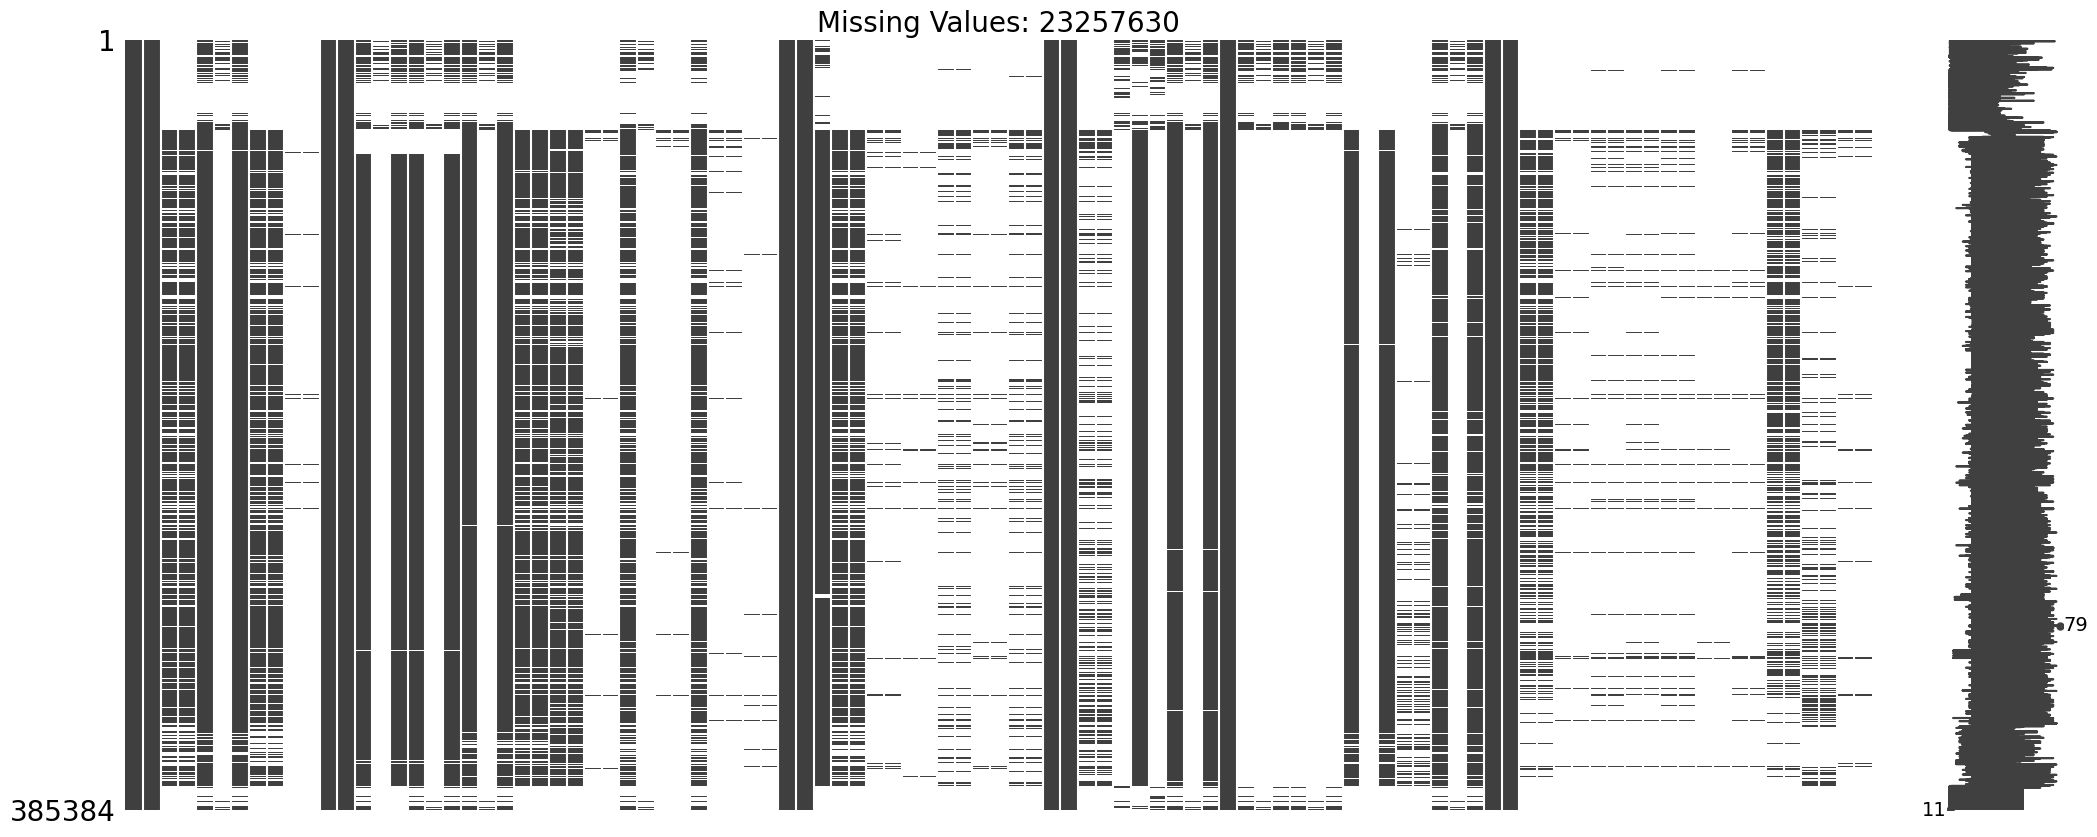

In [5]:
import missingno as msno
import matplotlib.pyplot as plt

# chech total missing values for comparison
total_missing_values = data.isnull().sum().sum()
print("Total Missing Values:", total_missing_values)

# show missing data with matrix
msno.matrix(data)
plt.title("Missing Values: {}".format(total_missing_values), fontsize=20)
plt.show()

### My observations:

- The top of the matrix reveals a different pattern. It shows that the first ~10% of entries have a lot more missing, probably due to a different data import policy and simply lacking one.
- The matrix shows that many columns have almost nothing, and some of them can be removed. This can be due to several reasons. For instance, being an optional field or lack of documentation on how to fill in the column during the data import.
- Columns with partial missing can be due to product segments, i.e. products that don't have certain attributes (e.g. sweet products with zero salt).
- Some columns share missing in the same rows, possibly pointing to data entry issues. Some imports were done despite sparse information about the product.

-----

<AxesSubplot:>

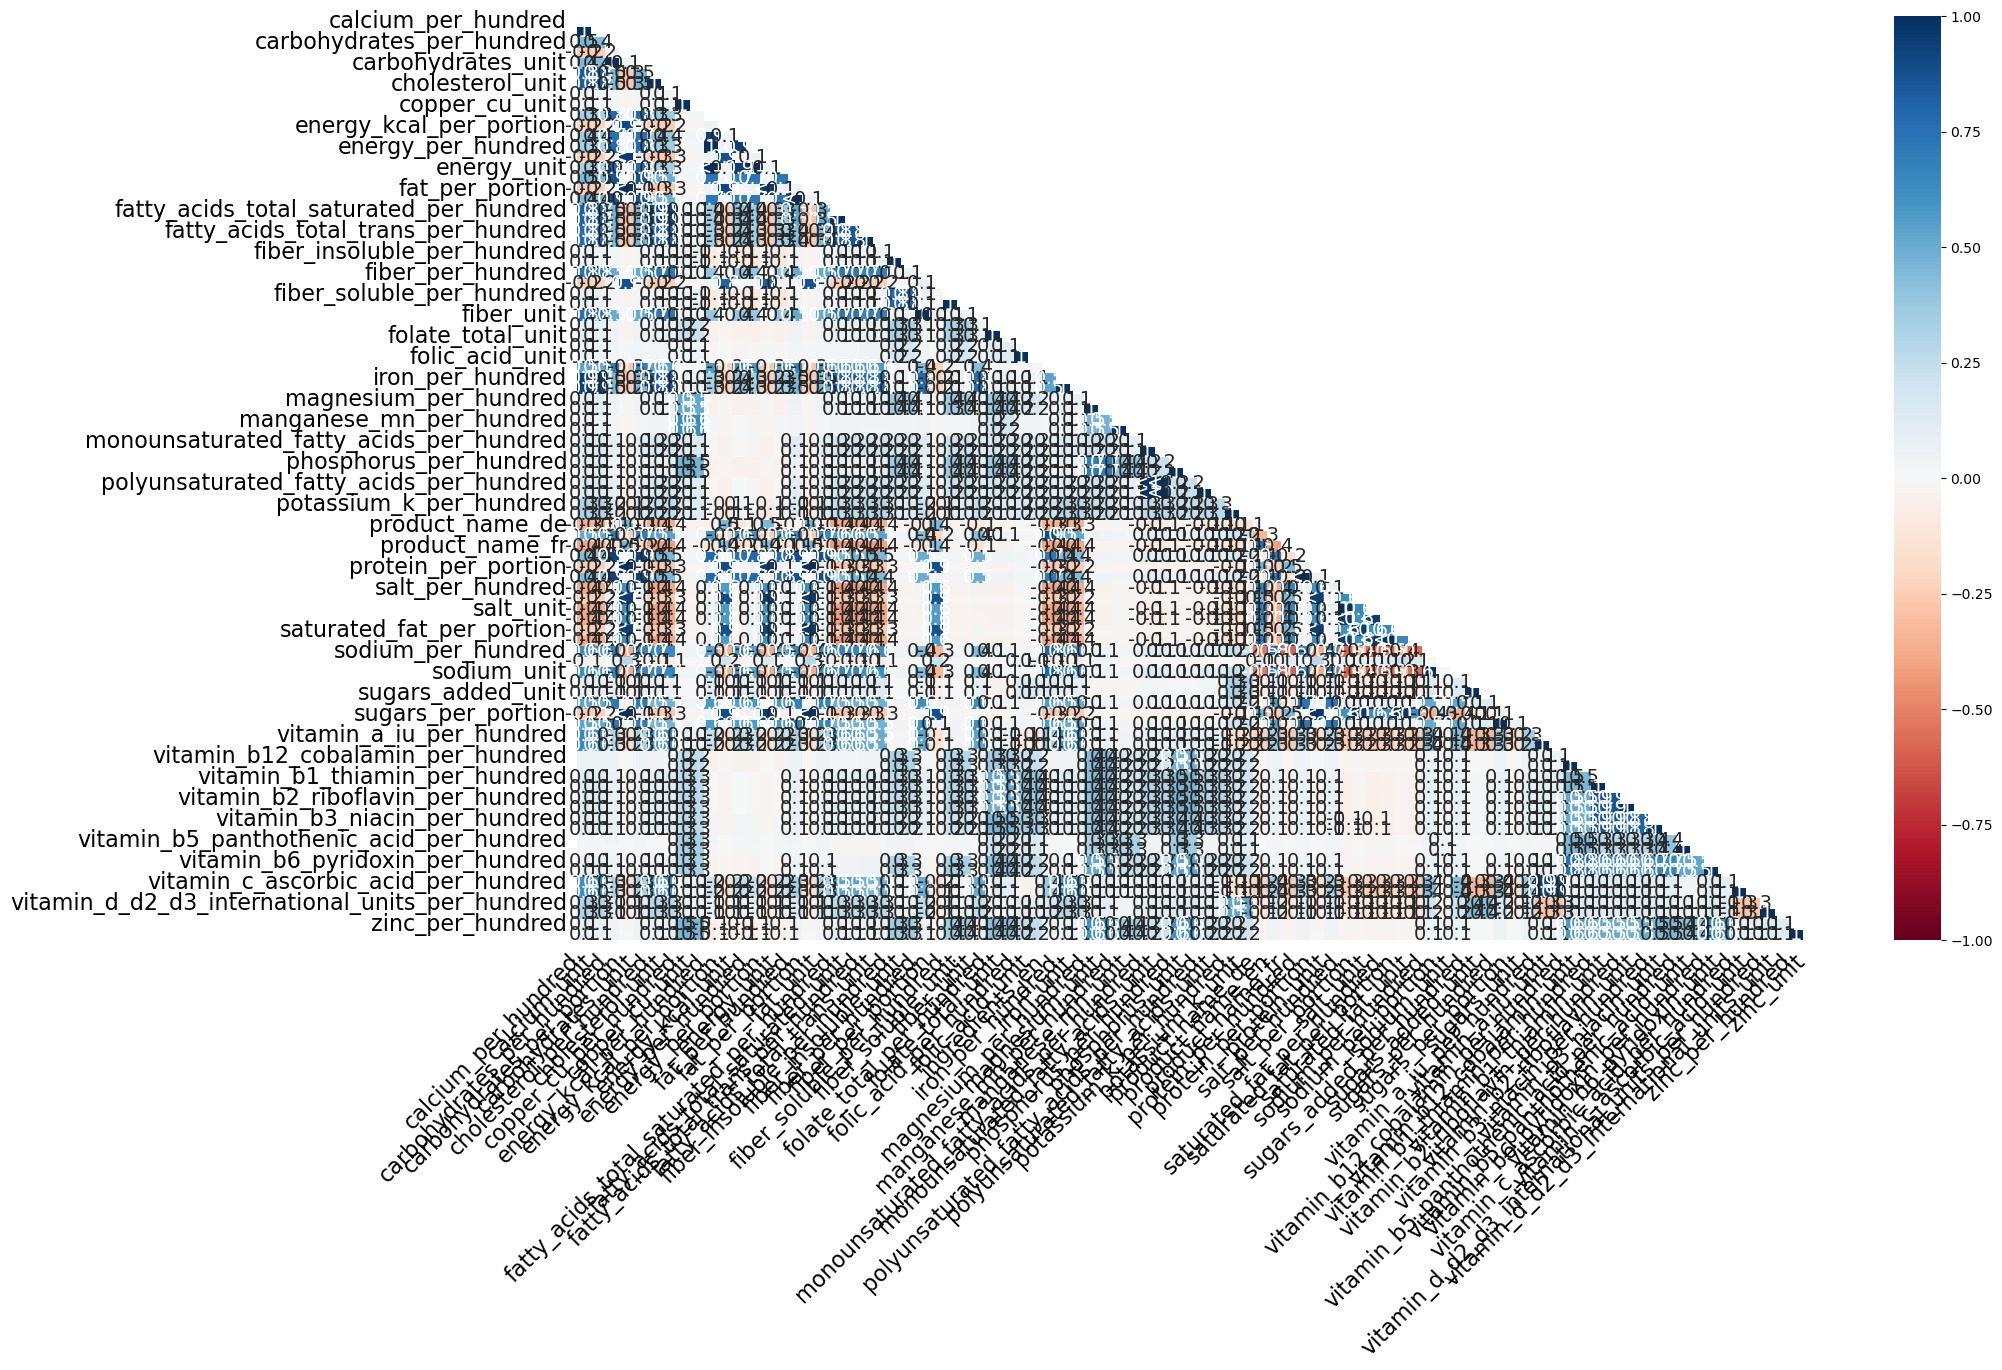

In [6]:
# Ive decided to visualize the correlation between the number of missing values in different columns as a heatmap
msno.heatmap(data)

#### My observations from the heatmap:

- The heatmap shows how missing values in different columns are related to each other which is easier to interpret.

1. how I understand presented data on the heatmap:
- values close to -1: if one column has data, the other is usually missing.
- values close to 0: there is no connection between missing values of the two columns.
- values close to 1: if one column has missing values, the other most likely does too.

2. what can I read from the heatmap about open food data:
- dark blue spaces show strong positive correlations: some columns tend to have missing values together, i.e. fiber_per_hundred and potassium_k_per_hundred. This means if fiber information is missing, potassium data is often missing too.
- protein_per_hundred_energy and calculated_energy are also highly correlated.
- orange-red spaces show negative correlations - when one column is missing, the other is present, i.e. salt_per_hundred and saturated_fat_per_hundred show a moderate negative correlation.
- for example vitamins show quite similar missing data patterns, i.e. vitamin_a_iu_per_hundred and vitamin_c_ascorbic_acid_per_hundred are both often missing together. The reasons for that can be the way data was collected and also that nutrient information in certain product categories were incomplete.
- a lot of columns show correlations close to zero, i.e. calcium_per_hundred and energy_difference (no clear pattern followed).

-----

### Plot Missing Values for "per hundred", "per portion", "unit" and "others"

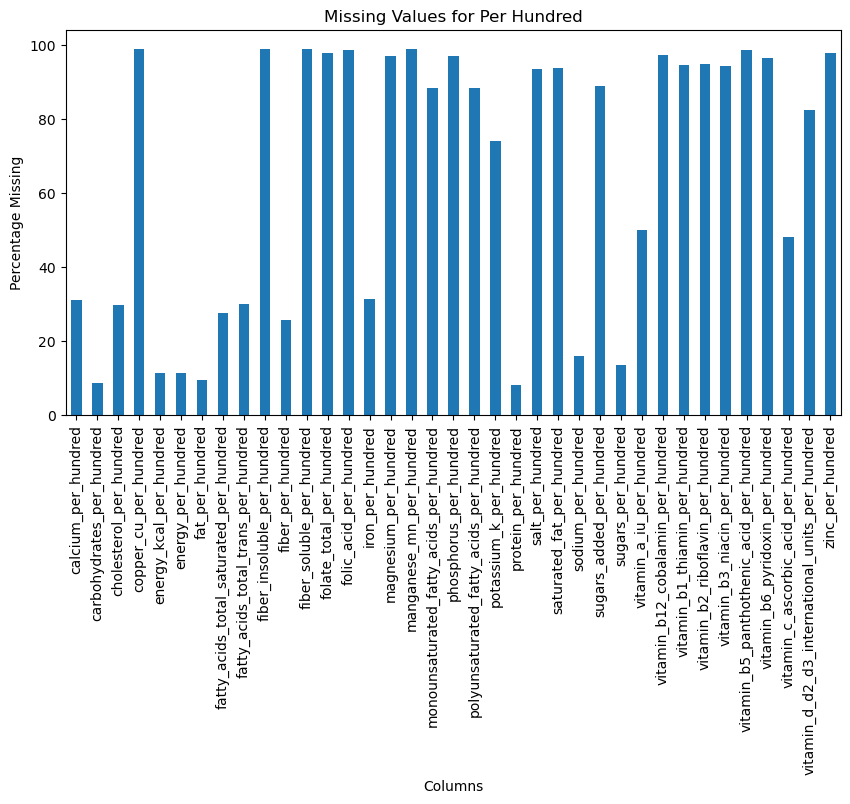

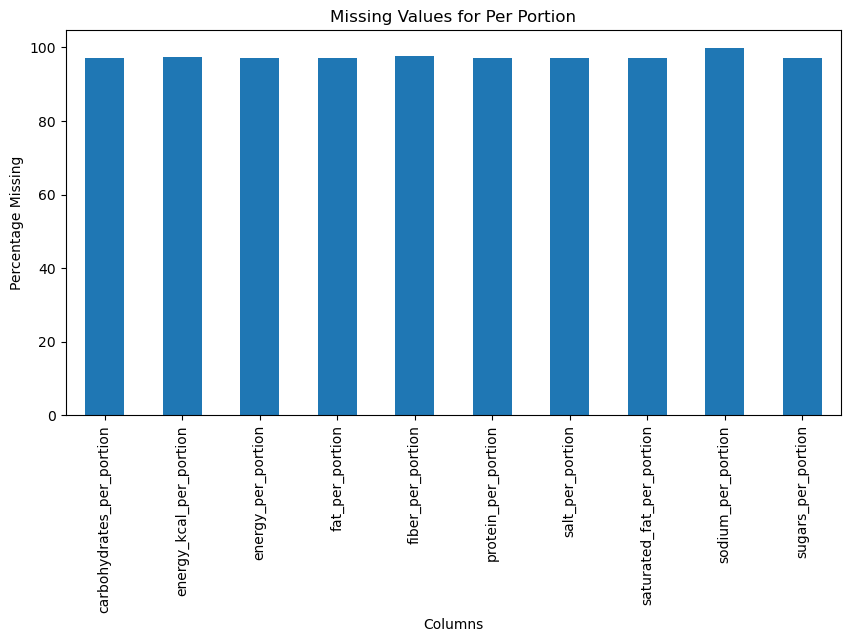

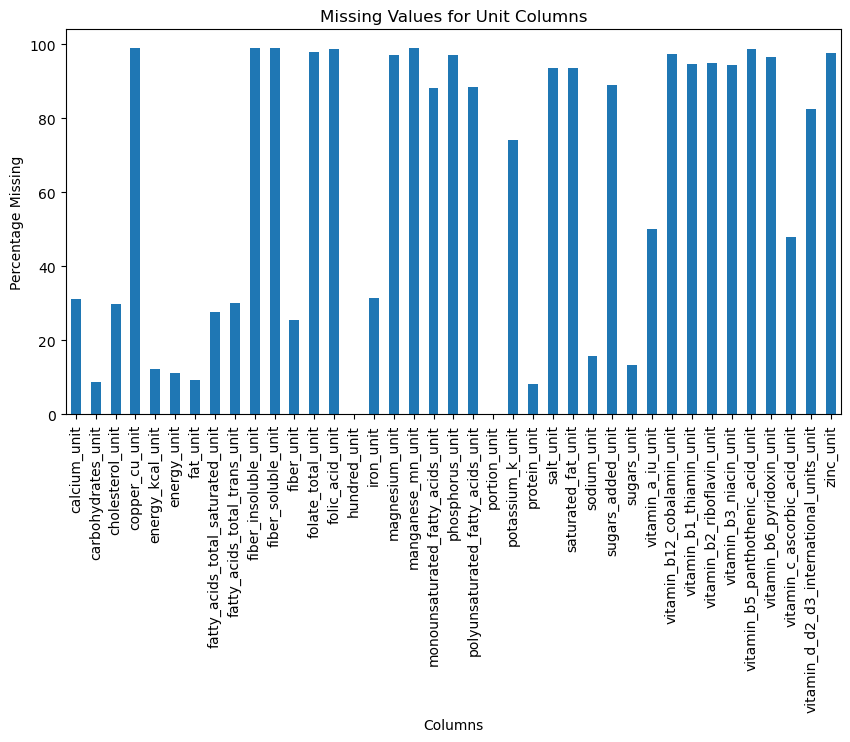

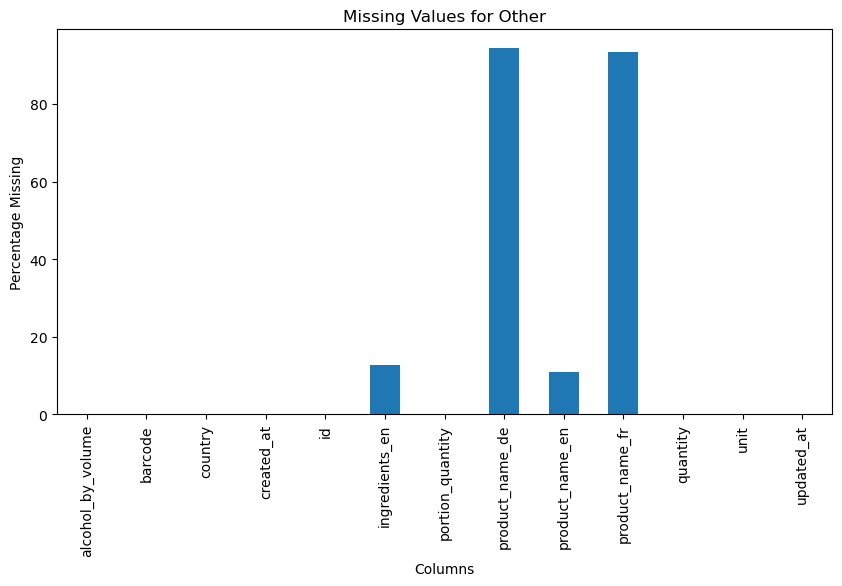

In [7]:
import matplotlib.pyplot as plt

# start by naming lists for categorizing the columns based on their suffix (copied from task A)
cols_per_hundred = [col for col in data.columns if col.endswith('_per_hundred')]
cols_per_portion = [col for col in data.columns if col.endswith('_per_portion')]
cols_unit = [col for col in data.columns if col.endswith('_unit')]
other_cols = [col for col in data.columns if col not in (cols_per_hundred + cols_per_portion + cols_unit)]

# create 4 lists (dictionary) for those 4 categories accordingly
lists = {
    "Per Hundred": cols_per_hundred,  # Columns with '_per_hundred' suffix
    "Per Portion": cols_per_portion,  # Columns with '_per_portion' suffix
    "Unit Columns": cols_unit,        # Columns with '_unit' suffix
    "Other": other_cols               # other columns
}

# Start  a dictionary to store missing data percentages for each group
missing_data = {}

# how many % of missing values are in each group
for name, columns in lists.items():  
    # Count the number of missing values for the columns in the group
    missing_count = data[columns].isnull().sum()
    # Calculate the % of missing values
    missing_percentage = (missing_count / len(data)) * 100
    # Save the missing % in the dictionary
    missing_data[name] = missing_percentage

# Plot the missing value % for each group
for name, percentages in missing_data.items():  
    # Plot a bar chart for the group
    percentages.plot(kind='bar', figsize=(10, 5), title=f"Missing Values for {name}")
    plt.ylabel("Percentage Missing")
    plt.xlabel("Columns")
    plt.show()

### My observations from the plots:

1. **Per Hundred Columns**:
   - Many columns have a high percentage of missing values, especially for micronutrients (e.g., vitamins and minerals) and fatty acids.

2. **Per Portion Columns**:
   - Almost all columns show missing values close to 100%, showing that there is a lack of portion-specific data.

3. **Unit Columns**:
   - Similar to the `_per_hundred` group, unit-related columns have many gaps, especially for detailed nutrients.

4. **Other Columns**:
   - Metadata columns like `product_name` and `ingredients_text` have substantial missing data, while fields like `id` and `barcode` are mostly complete.
   
   --------

### Remove rows and columns that are completely empty (if there is any).

In [8]:
# we need to see the dataset initial shape
initial_shape = data.shape
print(f"Initial shape: {initial_shape[0]} samples, {initial_shape[1]} features")

# get rid of empty rows
data = data.dropna(how='all', axis=0)

# the same with empty columns
data = data.dropna(how='all', axis=1)

# lets see the final shape
final_shape = data.shape
print(f"After removing completely empty rows and columns: {final_shape[0]} samples, {final_shape[1]} features")

Initial shape: 385384 samples, 99 features
After removing completely empty rows and columns: 385384 samples, 99 features


### My observation:

Outcome: None were found, so no changes were made as the dataset was already well-structured, with no fully empty rows or columns.

----

### Replace missing values in `_unit` columns with the most frequent value.

In [9]:
# Select `_unit` columns
unit_columns = [col for col in data.columns if col.endswith('_unit')]

# Check the first few `_unit` columns to better understand the data there
print("Example of _unit column values:")
for col in unit_columns[:3]:  # Show the first 3 _unit columns
    print(f"\nColumn: {col}")
    print(data[col].value_counts(dropna=False))  # Includes missing values

# Replace missing values with the most frequent value
for col in unit_columns:
    if data[col].isnull().any():  # Only process columns with missing values
        most_frequent = data[col].mode()[0]  # Get the most frequent value
        data[col].fillna(most_frequent, inplace=True)  # Fill missing values
        print(f"Imputed missing values in column '{col}' with: {most_frequent}")

# check the final dataset shape
print(f"\nAfter imputing _unit columns, the data shape is: {data.shape}")

Example of _unit column values:

Column: calcium_unit
mg     265086
NaN    120298
Name: calcium_unit, dtype: int64

Column: carbohydrates_unit
g      351828
NaN     33556
Name: carbohydrates_unit, dtype: int64

Column: cholesterol_unit
mg     270329
NaN    115055
Name: cholesterol_unit, dtype: int64
Imputed missing values in column 'calcium_unit' with: mg
Imputed missing values in column 'carbohydrates_unit' with: g
Imputed missing values in column 'cholesterol_unit' with: mg
Imputed missing values in column 'copper_cu_unit' with: mg
Imputed missing values in column 'energy_kcal_unit' with: kCal
Imputed missing values in column 'energy_unit' with: kJ
Imputed missing values in column 'fat_unit' with: g
Imputed missing values in column 'fatty_acids_total_saturated_unit' with: g
Imputed missing values in column 'fatty_acids_total_trans_unit' with: g
Imputed missing values in column 'fiber_insoluble_unit' with: g
Imputed missing values in column 'fiber_soluble_unit' with: g
Imputed missing

### My observation:

This technique ensured that missing values were replaced with the most frequent unit type, keeping the data consistency.
This is a simple and effective strategy for *categorical data* to handle missing categories.

----

### Fill missing values in `product_name_en` using similar columns

In [10]:
# First I need to check the number of missing values in `product_name_en`
# This helps me establish a baseline to measure how many values we manage to fill
missing_before = data['product_name_en'].isnull().sum()
print(f"Missing values in 'product_name_en' before: {missing_before}")

# Then i need to identify the columns that might have similar information
related_columns = ['product_name', 'product_name_fr', 'product_name_de']  # Example related columns
print("Inspecting related columns for available data:")

# how many non-missing values are available in these columns?
for col in related_columns:
    if col in data.columns: 
        print(f"{col}: {data[col].notnull().sum()} non-missing values")

# Now I can fill missing values in `product_name_en` using the values from related columns
for col in related_columns:
    if col in data.columns:  
        # values from the related column will fill missing values in `product_name_en`
        data['product_name_en'].fillna(data[col], inplace=True)

# what is the number of missing values in `product_name_en` after filling?
# Calculate how many rows were successfully filled and how many are still missing
missing_after = data['product_name_en'].isnull().sum()
filled_rows = missing_before - missing_after

# Print the final results
print(f"\nNumber of rows filled: {filled_rows}")
print(f"Missing values in 'product_name_en' after: {missing_after}")

Missing values in 'product_name_en' before: 42540
Inspecting related columns for available data:
product_name_fr: 25560 non-missing values
product_name_de: 21398 non-missing values

Number of rows filled: 18299
Missing values in 'product_name_en' after: 24241


### My observation:

Many missing values were replaced and it improved the completeness of the product_name_en column.
This technique shows how important is to use overlapping information.

----

### Address missing values in the `iron_per_hundred` column.

In [11]:
# First I need to inspect the `iron_per_hundred` column by checking the initial number of missing values
missing_before = data['iron_per_hundred'].isnull().sum()
total_rows = len(data)
print(f"Missing values in 'iron_per_hundred' before: {missing_before}")
print(f"Percentage of missing values: {missing_before / total_rows * 100:.2f}%")

# Print the distribution of non-missing values
print("\nDistribution of non-missing values in 'iron_per_hundred':")
print(data['iron_per_hundred'].dropna().describe())  # print statistical summary

# Then I replace the missing values based on the assumption that missing means 'iron-free'
# Replace missing values with 0
data['iron_per_hundred'].fillna(0, inplace=True)

# Show the final results after replacing
missing_after = data['iron_per_hundred'].isnull().sum()
print(f"\nMissing values in 'iron_per_hundred' after: {missing_after}")
print(f"Number of rows filled: {missing_before - missing_after}")

# Final verification of the updated column by printing
print("\nUpdated distribution of 'iron_per_hundred':")
print(data['iron_per_hundred'].describe())  # print statistical summary of the updated column

Missing values in 'iron_per_hundred' before: 120995
Percentage of missing values: 31.40%

Distribution of non-missing values in 'iron_per_hundred':
count    264389.000000
mean          7.621178
std        1581.060960
min           0.000000
25%           0.000000
50%           1.000000
75%           2.400000
max      769230.770000
Name: iron_per_hundred, dtype: float64

Missing values in 'iron_per_hundred' after: 0
Number of rows filled: 120995

Updated distribution of 'iron_per_hundred':
count    385384.000000
mean          5.228436
std        1309.558164
min           0.000000
25%           0.000000
50%           0.000000
75%           1.590000
max      769230.770000
Name: iron_per_hundred, dtype: float64


### My observation:

All missing values were replaced according to the logic, aligning with expectations (i.e., ice cream likely has no iron).
All those facts should be checked with general knowledge, although this technique is very practial (it is assumption only as missing iron is not qual no iron).

------------

### Replace missing values in `ingredients_en` with "ingredient_missing"

In [12]:
# Checking detailled the `ingredients_en` column
# Checking the initial number of missing values
missing_before = data['ingredients_en'].isnull().sum()
total_rows = len(data)
print(f"Missing values in 'ingredients_en' before: {missing_before}")
print(f"Percentage of missing values: {missing_before / total_rows * 100:.2f}%")

# Then I replace missing values with "ingredient_missing"
data['ingredients_en'].fillna("ingredient_missing", inplace=True)

# I report results after replacing missing values
missing_after = data['ingredients_en'].isnull().sum()
print(f"\nMissing values in 'ingredients_en' after: {missing_after}")
print(f"Number of rows updated: {missing_before - missing_after}")

# Which values which have been updated?
print("\nSample of updated `ingredients_en` values:")
print(data['ingredients_en'].sample(5))  # Print a random sample of 5 rows to verify changes

Missing values in 'ingredients_en' before: 49083
Percentage of missing values: 12.74%

Missing values in 'ingredients_en' after: 0
Number of rows updated: 49083

Sample of updated `ingredients_en` values:
382403                                   ingredient_missing
358629    ENRICHED WHEAT FLOUR (NIACIN, REDUCED IRON, TH...
345778    COOKED EGG WHITES (EGG WHITES, CORN STARCH, SA...
170953    BANANA ENRICHED WHEAT FLOUR (UNBLEACHED WHEAT ...
35993         Sugar, Cocoa,  Butter, Whole Milk Powder, ...
Name: ingredients_en, dtype: object


### My observation:

Labeling missing text as "missing" makes it clear there was no data, so it’s easier to understand and avoids mistakes in analysis.

------

### Drop columns with more than 95% missing values

In [13]:
# Calculate the percentage of missing values for each column
# - `data.isnull()` creates a DataFrame where missing values are marked as True (1) and others as False (0).
# - `.mean()` calculates the average (fraction of missing values) for each column.
# - Multiplying by 100 to get the percentage of missing values for each column.
missing_percentages = data.isnull().mean() * 100  

# Identify columns with more than 95% missing values
# - Use a filter to find column names where the percentage of missing values is greater than 95%.
# - The `.index` gives me the column names.
columns_to_drop = missing_percentages[missing_percentages > 95].index

# Print the number of columns to drop and their names
print(f"Columns with more than 95% missing values ({len(columns_to_drop)}):")
print(columns_to_drop.tolist())  # It shows the list of columns to be removed

# Drop these columns from the dataset
# - The `.drop()` method removes the specified columns from the dataset.
# - `axis=1` ensures we drop columns, not rows.
data = data.drop(columns=columns_to_drop)

# Report the shape of the remaining dataset
# - The first value (`data.shape[0]`) is the number of rows (samples).
# - The second value (`data.shape[1]`) is the number of columns (features).
print(f"\nShape of the data after dropping columns: {data.shape[0]} rows, {data.shape[1]} features")

Columns with more than 95% missing values (22):
['carbohydrates_per_portion', 'copper_cu_per_hundred', 'energy_kcal_per_portion', 'energy_per_portion', 'fat_per_portion', 'fiber_insoluble_per_hundred', 'fiber_per_portion', 'fiber_soluble_per_hundred', 'folate_total_per_hundred', 'folic_acid_per_hundred', 'magnesium_per_hundred', 'manganese_mn_per_hundred', 'phosphorus_per_hundred', 'protein_per_portion', 'salt_per_portion', 'saturated_fat_per_portion', 'sodium_per_portion', 'sugars_per_portion', 'vitamin_b12_cobalamin_per_hundred', 'vitamin_b5_panthothenic_acid_per_hundred', 'vitamin_b6_pyridoxin_per_hundred', 'zinc_per_hundred']

Shape of the data after dropping columns: 385384 rows, 77 features


### My observation:
Removing the columns with too much missing data makes the dataset cleaner and it presents us only important information. The removed columns did not contain useful information (especially ingredients_en).

-------

# Preliminary Exploratory Data Analysis (EDA)

### Visualize the distribution of sample proportions for the country and unit variables.

Categorical variables and their unique counts:
barcode: 374446 unique values
calcium_unit: 1 unique values
carbohydrates_unit: 1 unique values
cholesterol_unit: 1 unique values
copper_cu_unit: 1 unique values
country: 7 unique values
created_at: 46990 unique values
energy_kcal_unit: 1 unique values
energy_unit: 1 unique values
fat_unit: 1 unique values
fatty_acids_total_saturated_unit: 1 unique values
fatty_acids_total_trans_unit: 1 unique values
fiber_insoluble_unit: 1 unique values
fiber_soluble_unit: 1 unique values
fiber_unit: 1 unique values
folate_total_unit: 1 unique values
folic_acid_unit: 1 unique values
hundred_unit: 3 unique values
ingredients_en: 247228 unique values
iron_unit: 1 unique values
magnesium_unit: 1 unique values
manganese_mn_unit: 1 unique values
monounsaturated_fatty_acids_unit: 1 unique values
phosphorus_unit: 1 unique values
polyunsaturated_fatty_acids_unit: 1 unique values
portion_unit: 7 unique values
potassium_k_unit: 1 unique values
product_name_de: 1857

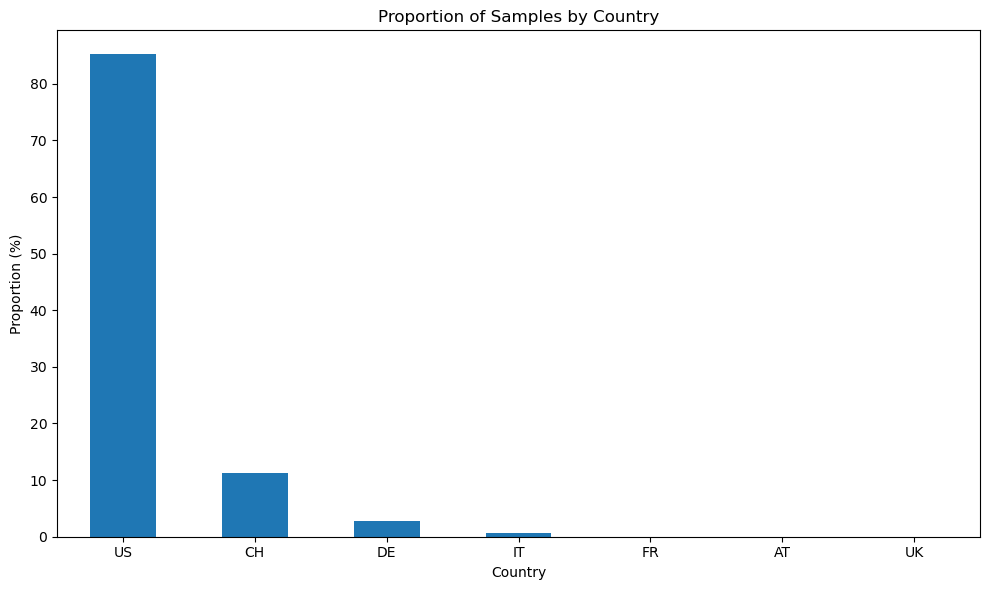


Proportion of samples in each unit:
g       85.853331
ml      12.796587
?        0.719283
cl       0.269082
l        0.225749
kg       0.125330
dl       0.007525
Floz     0.001297
Oz       0.001038
Lb       0.000778
Name: unit, dtype: float64


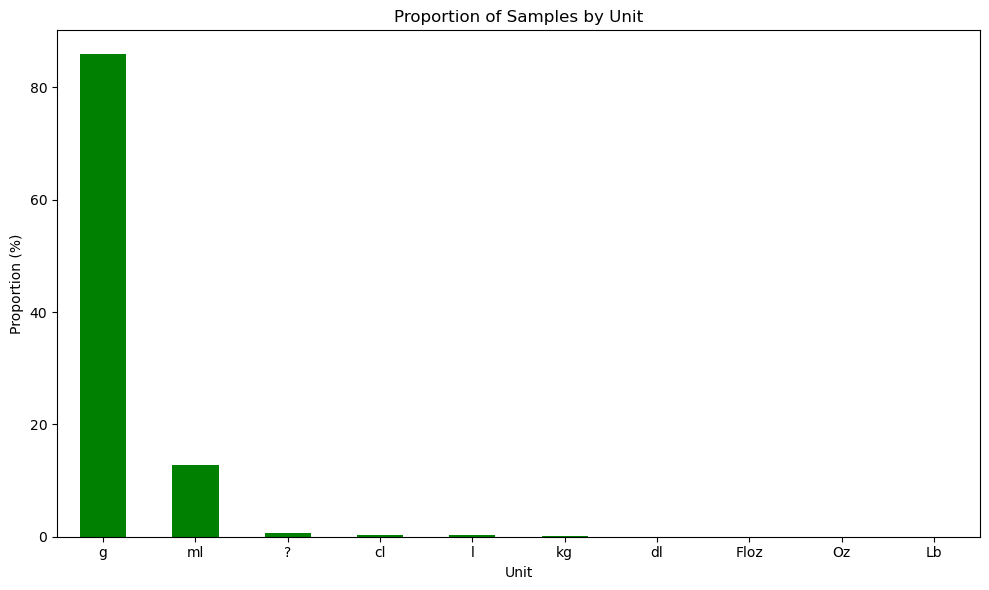

In [14]:
import matplotlib.pyplot as plt 

# WHich categorical variables do we have and what are their unique values
categorical_columns = [col for col in data.columns if data[col].dtype == 'object']
print("Categorical variables and their unique counts:")
for col in categorical_columns:
    print(f"{col}: {data[col].nunique()} unique values")  

# Analyze the `country` column
# Proportion of samples in each category for the `country` column
country_proportions = data['country'].value_counts(normalize=True) * 100
print("\nProportion of samples in each country:")
print(country_proportions)

# Visualize the `country` proportions
# Plot the proportions of samples by country
plt.figure(figsize=(10, 6))
country_proportions.plot(kind='bar')
plt.title("Proportion of Samples by Country")
plt.xlabel("Country")
plt.ylabel("Proportion (%)")
plt.xticks(rotation=0, fontsize=10) #adjust the orientation and size
plt.tight_layout()
plt.show()

# Analyze of the `unit` column
# Proportion of samples in each category for the `unit` column
unit_proportions = data['unit'].value_counts(normalize=True) * 100
print("\nProportion of samples in each unit:")
print(unit_proportions)

# Visualize the `unit` proportions
# Plot the proportions of samples by unit
plt.figure(figsize=(10, 6))
unit_proportions.plot(kind='bar', color='green')
plt.title("Proportion of Samples by Unit")
plt.xlabel("Unit")
plt.ylabel("Proportion (%)")
plt.xticks(rotation=0, fontsize=10) #adjust the orientation and size
plt.tight_layout()
plt.show()

To analyze categorical variables, I first identified all columns with the data type `object` and calculated the number of unique values in each. Next, I focused on two key categorical columns: `country` and `unit`. 

For both columns:
1. I calculated the proportion of samples in each category to understand their distribution.
2. I visualized these proportions using bar plots to make the analysis more intuitive.

---

### Show descriptive stats and visualizations of numerical variables.

count     mean       std  \
alcohol_by_volume                                385384.0     0.03      0.80   
calcium_per_hundred                              264979.0   116.99   2557.36   
carbohydrates_per_hundred                        351551.0    33.90     40.72   
cholesterol_per_hundred                          270282.0    58.98   1934.72   
energy_kcal_per_hundred                          341824.0   272.09    257.83   
energy_per_hundred                               341821.0  1137.84   1077.75   
fat_per_hundred                                  348635.0    12.72     19.49   
fatty_acids_total_saturated_per_hundred          279151.0     4.94      8.50   
fatty_acids_total_trans_per_hundred              269607.0     0.03      1.29   
fiber_per_hundred                                286729.0     2.92      5.88   
iron_per_hundred                                 385384.0     5.23   1309.56   
monounsaturated_fatty_acids_per_hundred           45074.0     8.35     14.43   
polyunsaturated_fatty_acids_per_hundred           44720.0     5.37      9.44   
portion_quantity                                 385384.0     4.18     33.05   
potassium_k_per_hundred                           99569.0   555.45  11465.37   
protein_per_hundred                              353614.0     7.24     14.24   
quantity                                         385384.0    97.55    400.34   
salt_per_hundred                                  24360.0     0.92      3.00   
saturated_fat_per_hundred                         23910.0     5.85      8.32   
sodium_per_hundred                               324074.0     1.65     70.91   
sugars_added_per_hundred                          42478.0    23.99     25.62   
sugars_per_hundred                               333279.0    16.96     31.07   
vitamin_a_iu_per_hundred                         192093.0   494.24   2445.25   
vitamin_b1_thiamin_per_hundred                    20527.0     0.97     13.46   
vitamin_b2_riboflavin_per_hundred                 19808.0     1.74    142.16   
vitamin_b3_niacin_per_hundred                     21242.0    10.49     73.35   
vitamin_c_ascorbic_acid_per_hundred              200256.0    16.00    583.40   
vitamin_d_d2_d3_international_units_per_hundred   67024.0    14.19     73.26   

                                                 min     25%      50%  \
alcohol_by_volume                                0.0    0.00     0.00   
calcium_per_hundred                              0.0    0.00    36.00   
carbohydrates_per_hundred                        0.0    6.67    23.44   
cholesterol_per_hundred                          0.0    0.00     0.00   
energy_kcal_per_hundred                          0.0   89.00   267.00   
energy_per_hundred                               0.0  372.38  1117.13   
fat_per_hundred                                  0.0    0.00     5.47   
fatty_acids_total_saturated_per_hundred          0.0    0.00     2.00   
fatty_acids_total_trans_per_hundred              0.0    0.00     0.00   
fiber_per_hundred                                0.0    0.00     1.60   
iron_per_hundred                                 0.0    0.00     0.00   
monounsaturated_fatty_acids_per_hundred          0.0    0.00     3.19   
polyunsaturated_fatty_acids_per_hundred          0.0    0.00     1.82   
portion_quantity                                 0.0    0.00     0.00   
potassium_k_per_hundred                          0.0   84.00   171.00   
protein_per_hundred                              0.0    0.42     4.55   
quantity                                         0.0   28.00    43.00   
salt_per_hundred                                 0.0    0.05     0.22   
saturated_fat_per_hundred                        0.0    0.50     2.00   
sodium_per_hundred                               0.0    0.03     0.26   
sugars_added_per_hundred                         0.0    5.20    16.00   
sugars_per_hundred                               0.0    1.67     6.45   
vitamin_a_iu_per_hundred                         0.0

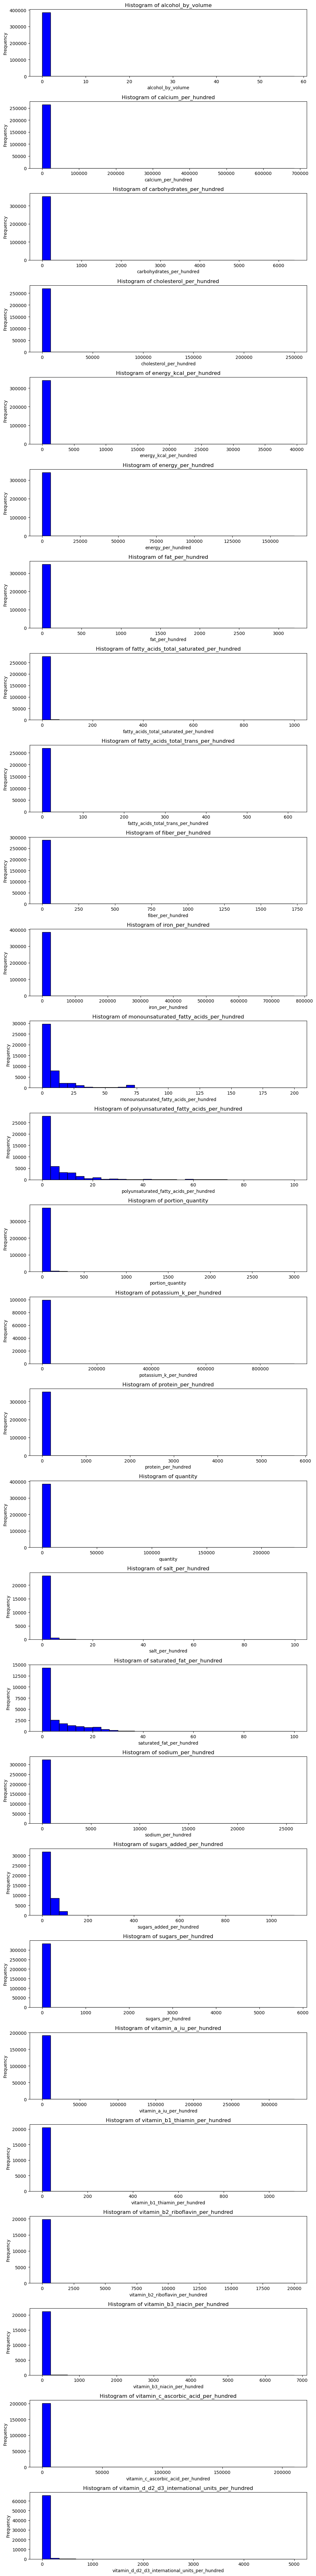

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Make sure all columns are shown
pd.set_option('display.max_columns', None)

# Select numerical variables 
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = [col for col in numerical_columns if col != 'id']  # we dont need ID

# Show descriptive statistics with improved readability using transpose
stats = data[numerical_columns].describe().T.round(2)
display(stats)

# show all numerical variables in histograms
num_vars = len(numerical_columns)
fig, axes = plt.subplots(nrows=num_vars, ncols=1, figsize=(10, num_vars * 3))
for i, col in enumerate(numerical_columns):
    ax = axes[i]
    ax.hist(data[col].dropna(), bins=30, color='blue', edgecolor='black')
    ax.set_title(f"Histogram of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

# Fit layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### My observations:

- The numerical variables have large value ranges, such as energy_per_hundred ranging from 0 to over 150,000 with extreme outliers, and sodium_per_hundred having an unusually high maximum of 10,000.
- Some variables, like energy_per_hundred (mean 273, median 267) and fat_per_hundred (mean 9.2, median 8.0), are right-skewed because the mean is higher than the median.
- regarding distribution: 
* The distribution of calcium_per_hundred is right-skewed, with most values near zero and a long tail going toward higher values.
* skewed distributions: like energy_per_hundred and sodium_per_hundred, which are  right-skewed because of extreme outliers.
- outliers: variables like energy_per_hundred and sodium_per_hundred have extreme values, as shown by the long tails in their histograms.

- For better analysis, we could remove outliers like in energy_per_hundred, normalize skewed variables like sodium_per_hundred, and focus on important variables like energy_per_hundred and fat_per_hundred. I have already excluded irrelevant ones like id, following good practices from the learning material.

---

### Check for problematic values + plotting

Fixing 122067 invalid values in calcium_per_hundred for unit 'mg'
Fixing 34909 invalid values in carbohydrates_per_hundred for unit 'g'
Fixing 115310 invalid values in cholesterol_per_hundred for unit 'mg'
Fixing 44392 invalid values in energy_per_hundred for unit 'kJ'
Fixing 36885 invalid values in fat_per_hundred for unit 'g'
Fixing 106265 invalid values in fatty_acids_total_saturated_per_hundred for unit 'g'
Fixing 115778 invalid values in fatty_acids_total_trans_per_hundred for unit 'g'
Fixing 98676 invalid values in fiber_per_hundred for unit 'g'
Fixing 67 invalid values in iron_per_hundred for unit 'mg'
Fixing 340314 invalid values in monounsaturated_fatty_acids_per_hundred for unit 'g'
Fixing 340664 invalid values in polyunsaturated_fatty_acids_per_hundred for unit 'g'
Fixing 289594 invalid values in potassium_k_per_hundred for unit 'mg'
Fixing 31942 invalid values in protein_per_hundred for unit 'g'
Fixing 361024 invalid values in salt_per_hundred for unit 'g'
Fixing 361474 inv

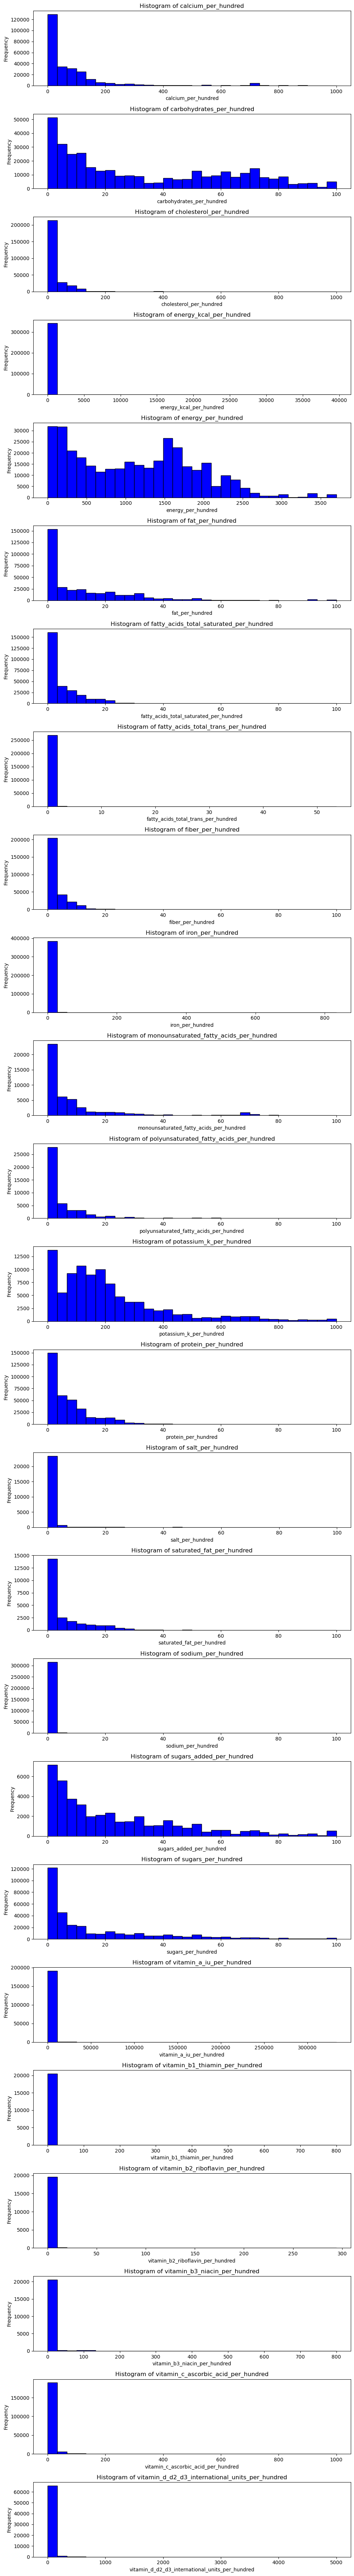

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Find all '_per_hundred' and '_unit' columns
per_hundred_columns = [col for col in data.columns if col.endswith('_per_hundred')]
unit_columns = [col for col in data.columns if col.endswith('_unit')]

# pick ranges for each unit
acceptable_ranges = {
    'g': (0, 100),
    'mg': (0, 1000),
    'µg': (0, 3000),
    'kJ': (0, 3700),
    'kcal': (0, 885),
    'IU (Vitamin A)': (0, 300_000),
    'IU (Vitamin D)': (0, 469)
}

# Check and clean '_per_hundred' values based on '_unit'
for per_hundred_col in per_hundred_columns:
    # we need the associated '_unit' column
    unit_col = per_hundred_col.replace('_per_hundred', '_unit')

    if unit_col in unit_columns:
        # Extract unit and values for cleaning
        unit_values = data[unit_col]
        per_hundred_values = data[per_hundred_col]

        # Check for invalid ranges based on unit
        for unit, (min_val, max_val) in acceptable_ranges.items():
            mask = (unit_values == unit) & ~per_hundred_values.between(min_val, max_val, inclusive='both')
            if mask.any():  # in case any invalid values are found
                print(f"Fixing {mask.sum()} invalid values in {per_hundred_col} for unit '{unit}'")
                data.loc[mask, per_hundred_col] = None  # mark invalid values as None

# show descriptive statistics for '_per_hundred' columns
stats = data[per_hundred_columns].describe().T  # Transpose for better readability
print("Descriptive Statistics for '_per_hundred' Columns (Transposed):")
print(round(stats, 2))  # Round to 2 decimal places for easier reading

# create histograms for '_per_hundred' accordingly
fig, axes = plt.subplots(nrows=len(per_hundred_columns), ncols=1, figsize=(10, len(per_hundred_columns) * 3))
for i, col in enumerate(per_hundred_columns):
    ax = axes[i] if len(per_hundred_columns) > 1 else axes  # we only need single subplot
    ax.hist(data[col].dropna(), bins=30, color='blue', edgecolor='black')
    ax.set_title(f"Histogram of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

# Adjust layout to avoid overlapping
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### My observations:

- Some values were unrealistic, like nutrients over 100g per 100g and were replaced with `NaN`.
- The correctness of `_per_hundred` values depends on their matching `_unit` column. Errors in units can cause major mistakes in analysis.
- Cleaning removed invalid values, making the data more accurate but slightly less complete (more `NaN` values).
- Histograms showed more realistic distributions after cleaning, with way less outliers.

---

# Investigate the three cases below analytically (including visualizations like scatterplots), identify potential inconsistencies and address them.

### Check for unrealistic data in the sum of macronutrients

Number of rows with unrealistic macronutrient totals: 20075
After cleaning, rows exceeding threshold: 0


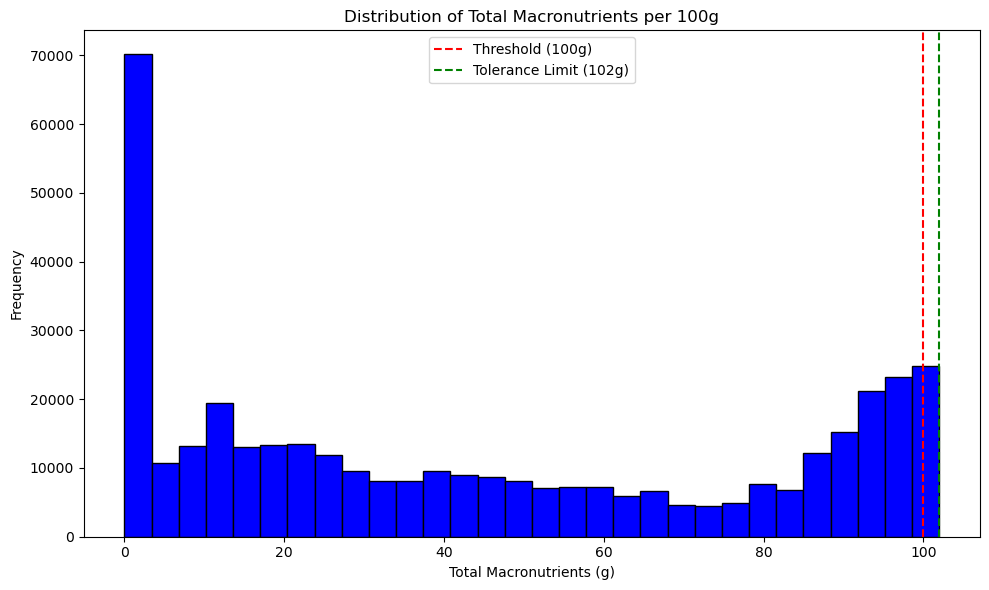

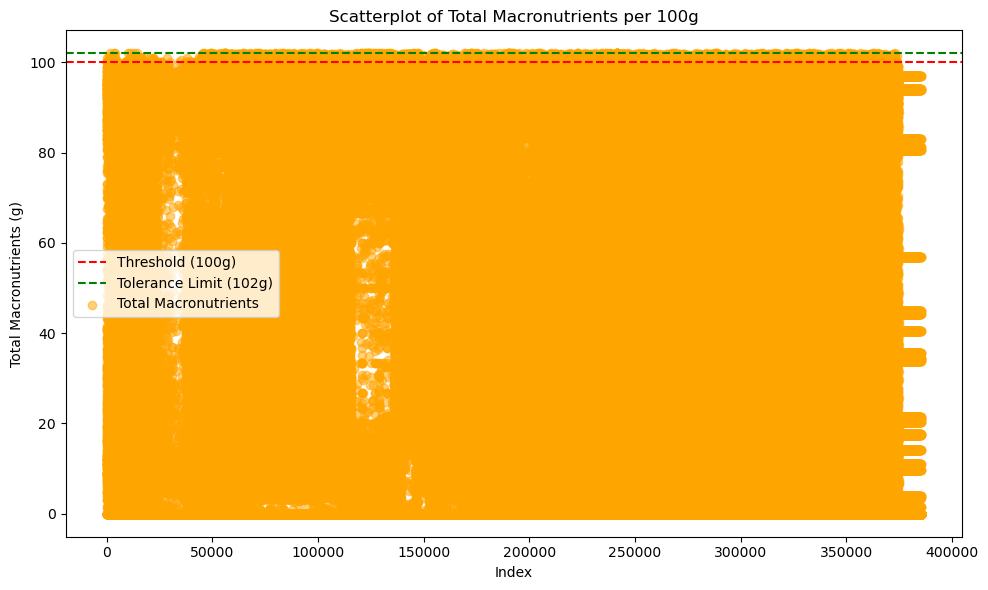

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# First I need to define relevant columns for macronutrients
macronutrient_cols = ['fat_per_hundred', 'protein_per_hundred', 'carbohydrates_per_hundred', 'fiber_per_hundred']

# Then calculate the total macronutrients per 100g using .sum
data['total_macronutrients'] = data[macronutrient_cols].sum(axis=1)

# In which rows the total exceeds 100g
threshold = 100  # Maximum realistic value
tolerance = 2  # Allow up to 2g rounding error (small margin)
invalid_rows = data[data['total_macronutrients'] > (threshold + tolerance)]

# Replace invalid rows with NaN for invalid macronutrient columns
if not invalid_rows.empty:
    print(f"Number of rows with unrealistic macronutrient totals: {len(invalid_rows)}")
    for col in macronutrient_cols:
        data.loc[data['total_macronutrients'] > (threshold + tolerance), col] = None

# Calculate again and check for final results
data['total_macronutrients'] = data[macronutrient_cols].sum(axis=1)  # Recalculate after cleaning
print(f"After cleaning, rows exceeding threshold: {len(data[data['total_macronutrients'] > (threshold + tolerance)])}")

# Visualize total macronutrients
plt.figure(figsize=(10, 6))
plt.hist(data['total_macronutrients'].dropna(), bins=30, color='blue', edgecolor='black')
plt.axvline(x=threshold, color='red', linestyle='--', label='Threshold (100g)')
plt.axvline(x=threshold + tolerance, color='green', linestyle='--', label='Tolerance Limit (102g)')
plt.title('Distribution of Total Macronutrients per 100g')
plt.xlabel('Total Macronutrients (g)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

# Scatterplot for visual pattern analysis
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['total_macronutrients'], alpha=0.5, color='orange', label='Total Macronutrients')
plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold (100g)')
plt.axhline(y=threshold + tolerance, color='green', linestyle='--', label='Tolerance Limit (102g)')
plt.title('Scatterplot of Total Macronutrients per 100g')
plt.xlabel('Index')
plt.ylabel('Total Macronutrients (g)')
plt.legend()
plt.tight_layout()
plt.show()

---

### The column "energy_per_hundred" measures the energy content in kJ. Analyze its relationship with the column "energy_kcal_per_hundred".

Statistics of the difference between `energy_kcal_per_hundred` and `calculated_kcal`:
count    340865.000000
mean          0.131605
std          13.699726
min        -538.240918
25%          -0.000478
50%           0.000000
75%           0.000478
max        2857.613767
Name: difference, dtype: float64


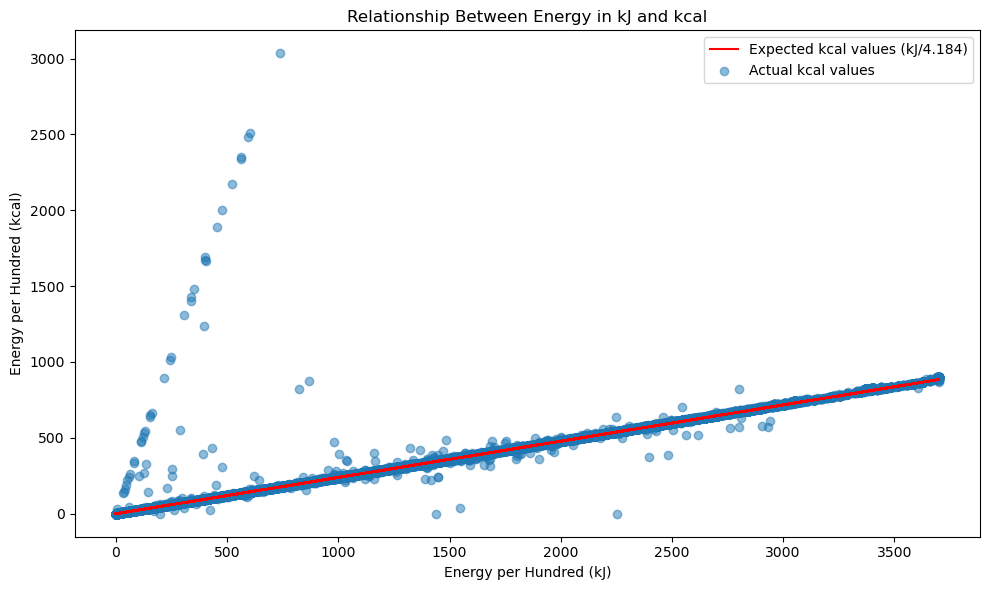

Number of rows with deviation greater than 2 kcal: 7877
        energy_per_hundred  energy_kcal_per_hundred  calculated_kcal  \
5                   1524.0                    368.0       364.244742   
67                  1400.0                    320.0       334.608031   
86                  1572.0                    371.0       375.717017   
114                 3700.0                    900.0       884.321224   
147                 1607.0                    380.0       384.082218   
...                    ...                      ...              ...   
385310              2054.0                    493.0       490.917782   
385338              2370.0                    570.0       566.443595   
385377              2548.0                    615.0       608.986616   
385380              1210.0                    285.0       289.196941   
385381              2418.0                    584.0       577.915870   

        difference  
5         3.755258  
67      -14.608031  
86       -4.7170

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# First define the expected conversion formula
expected_conversion = 4.184

# Create a column for the calculated kcal values from kJ
data['calculated_kcal'] = data['energy_per_hundred'] / expected_conversion

# Compare `calculated_kcal` with `energy_kcal_per_hundred`
data['difference'] = data['energy_kcal_per_hundred'] - data['calculated_kcal']

# Check statistics of the difference
print("Statistics of the difference between `energy_kcal_per_hundred` and `calculated_kcal`:")
print(data['difference'].describe())

# Visualize the relationship with a scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(data['energy_per_hundred'], data['energy_kcal_per_hundred'], alpha=0.5, label="Actual kcal values")
plt.plot(data['energy_per_hundred'], data['calculated_kcal'], color='red', label="Expected kcal values (kJ/4.184)")
plt.title("Relationship Between Energy in kJ and kcal")
plt.xlabel("Energy per Hundred (kJ)")
plt.ylabel("Energy per Hundred (kcal)")
plt.legend()
plt.tight_layout()
plt.show()

# Chech rows with significant deviations (e.g., >2 kcal difference)
tolerance = 2  # Define acceptable difference in kcal, the same as in the previous task
deviation_rows = data[abs(data['difference']) > tolerance]
print(f"Number of rows with deviation greater than {tolerance} kcal: {len(deviation_rows)}")
if not deviation_rows.empty:
    print(deviation_rows[['energy_per_hundred', 'energy_kcal_per_hundred', 'calculated_kcal', 'difference']])

In [19]:
# I remove the inconsistent rows
data_cleaned = data.drop(deviation_rows.index)
print(f"Rows after removing: {len(data_cleaned)}")

Rows after removing: 377507


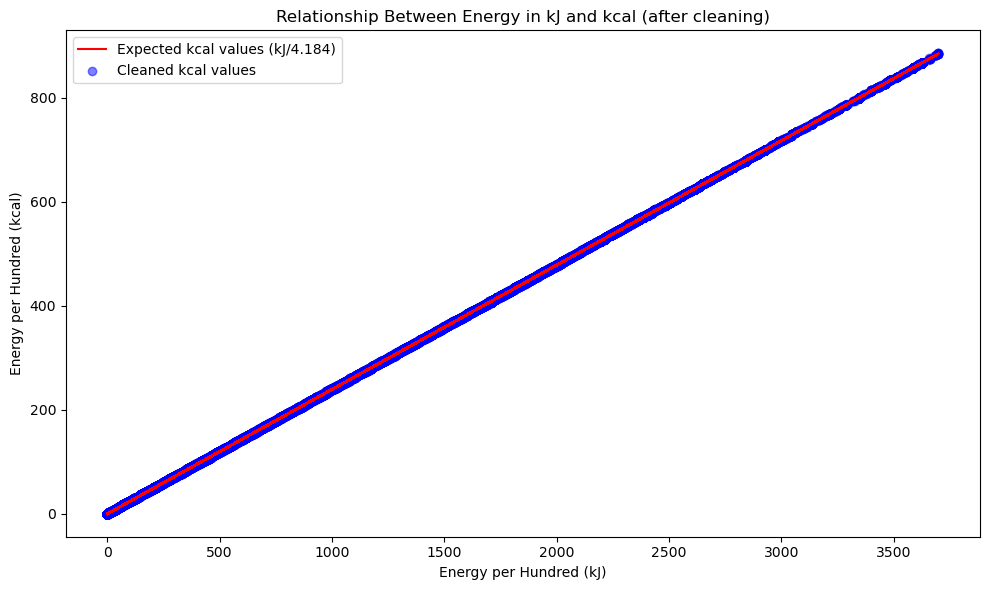

In [20]:
# visualize the data agaion after cleaning
plt.figure(figsize=(10, 6))
plt.scatter(data_cleaned['energy_per_hundred'], data_cleaned['energy_kcal_per_hundred'], alpha=0.5, color='blue', label='Cleaned kcal values')
plt.plot(data_cleaned['energy_per_hundred'], data_cleaned['calculated_kcal'], color='red', label='Expected kcal values (kJ/4.184)')
plt.title("Relationship Between Energy in kJ and kcal (after cleaning)")
plt.xlabel("Energy per Hundred (kJ)")
plt.ylabel("Energy per Hundred (kcal)")
plt.legend()
plt.tight_layout()
plt.show()

### My observations:
- After removing the 7877 rows, the data now shows a clear, linear relationship.
- The first scatter plot with raw data showed some points that didn’t follow the expected energy-to-kcal relationship (removed).
- I have not lost a lot of data as 7877 is only a small part of the dataset
- The cleaned dataset now follows the expected conversion rule and is ready for further analysis.

---

### 4c: Calculate the energy provided by these four macronutrients and compare this to the "energy_per_hundred"-column

#### My approach:

- I started by plotting the raw data to identify differences between the calculated energy from macronutrients and the recorded energy_per_hundred.
- THen I tested different tolerance levels as adviced to make a decision how to proceed with inconsistencies.
- My decision is to set the tolerance at 100 kJ, which removed 56543 rows (23-24 kcal).
- Decision justification: lower thresholds removed too many rows and higher thresholds left too many inconsistencies. 100 kJ threshold (≈ 23.9 kcal) improved the data quality while still keeping most of the data.
- The scatter plot after cleaning shows a clear straight line, which means the remaining data matches the expected energy values.

Summary statistics for energy differences:
count    252690.000000
mean         29.355938
std         109.545876
min       -3347.200000
25%          -3.280000
50%          15.760000
75%          56.050000
max        3700.000000
Name: energy_difference, dtype: float64
Number of rows with significant energy differences (> 10 kJ): 192192
        calculated_energy  energy_per_hundred  energy_difference
10                 1711.5              1741.0              -29.5
14                 1869.1              1797.0               72.1
37                  153.0               164.0              -11.0
56                  961.5               950.0               11.5
63                 1649.0              1600.0               49.0
...                   ...                 ...                ...
385005              240.7               222.0               18.7
385089              240.7               222.0               18.7
385173              240.7               222.0               18.7
385257        

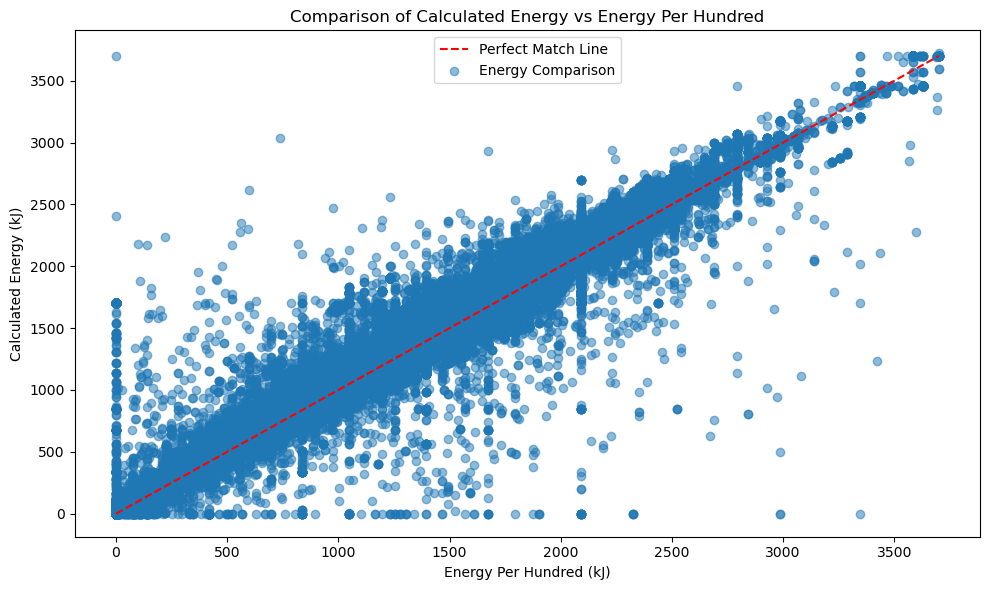

In [21]:
# First, define the energy content for each macronutrient (kJ/g)
energy_content = {
    'fat_per_hundred': 37,  # kJ per gram
    'protein_per_hundred': 17,
    'carbohydrates_per_hundred': 17,
    'fiber_per_hundred': 8
}

# Then, calculate the energy contribution of each macronutrient
for macronutrient, energy in energy_content.items():
    data[f'{macronutrient}_energy'] = data[macronutrient] * energy

# Calculate the total energy from macronutrients
data['calculated_energy'] = (
    data['fat_per_hundred_energy'] +
    data['protein_per_hundred_energy'] +
    data['carbohydrates_per_hundred_energy'] +
    data['fiber_per_hundred_energy']
)

# Compare the calculated energy to `energy_per_hundred`
data['energy_difference'] = data['calculated_energy'] - data['energy_per_hundred']

# Print the differences to compare
print("Summary statistics for energy differences:")
print(data['energy_difference'].describe())

# Define threshold and identify rows with significant differences
threshold = 10 # I chose the threshold of 10 kJ to spot differences and cover errors
significant_differences = data[abs(data['energy_difference']) > threshold]
print(f"Number of rows with significant energy differences (> {threshold} kJ): {len(significant_differences)}")
print(significant_differences[['calculated_energy', 'energy_per_hundred', 'energy_difference']])

# Visualize all the compared data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data['energy_per_hundred'], data['calculated_energy'], alpha=0.5, label='Energy Comparison')
plt.plot([0, data['energy_per_hundred'].max()], [0, data['energy_per_hundred'].max()], color='red', linestyle='--', label='Perfect Match Line')
plt.title('Comparison of Calculated Energy vs Energy Per Hundred')
plt.xlabel('Energy Per Hundred (kJ)')
plt.ylabel('Calculated Energy (kJ)')
plt.legend()
plt.tight_layout()
plt.show()

In [22]:
# I test different tolerance threshold
tolerances = [50, 60, 70, 80, 90, 100, 200, 300, 400, 500]

# dictionary to store results
results = {}

for threshold in tolerances:
    significant_differences = data[abs(data['energy_difference']) > threshold]
    count = len(significant_differences)
    results[threshold] = count
    print(f"A {threshold} kJ threshold gives no. with inconsistent rows: {count}")

A 50 kJ threshold gives no. with inconsistent rows: 88001
A 60 kJ threshold gives no. with inconsistent rows: 73698
A 70 kJ threshold gives no. with inconsistent rows: 62902
A 80 kJ threshold gives no. with inconsistent rows: 54821
A 90 kJ threshold gives no. with inconsistent rows: 46668
A 100 kJ threshold gives no. with inconsistent rows: 41024
A 200 kJ threshold gives no. with inconsistent rows: 11500
A 300 kJ threshold gives no. with inconsistent rows: 4182
A 400 kJ threshold gives no. with inconsistent rows: 2245
A 500 kJ threshold gives no. with inconsistent rows: 1584


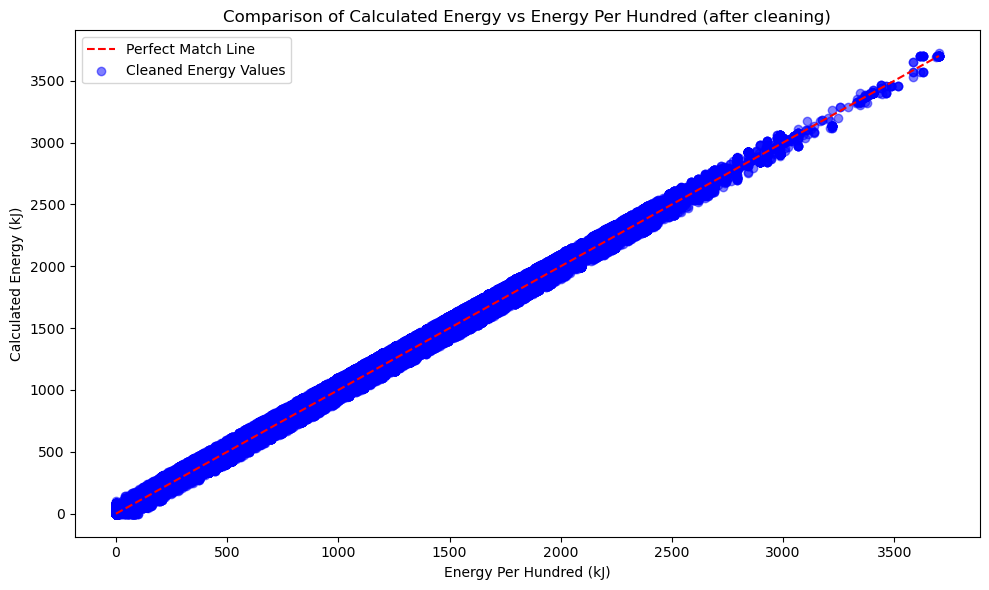

Removed 41024 rows due to differences greater than 100 kJ.


In [23]:
# I chose 100 as a threshold
threshold = 100
significant_differences = data[abs(data['energy_difference']) > threshold]

# remove inconsistent rows
data_cleaned = data.drop(significant_differences.index)

# Plot the data after cleaning
plt.figure(figsize=(10, 6))
plt.scatter(data_cleaned['energy_per_hundred'], data_cleaned['calculated_energy'], alpha=0.5, color='blue', label='Cleaned Energy Values')
plt.plot([0, data_cleaned['energy_per_hundred'].max()], [0, data_cleaned['energy_per_hundred'].max()], color='red', linestyle='--', label='Perfect Match Line')

plt.title(f"Comparison of Calculated Energy vs Energy Per Hundred (after cleaning)")
plt.xlabel('Energy Per Hundred (kJ)')
plt.ylabel('Calculated Energy (kJ)')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Removed {len(significant_differences)} rows due to differences greater than {threshold} kJ.")

### My observations:

- After removing 56543 rows, the data now shows a clear, linear relationship.
- The first scatter plot with raw data showed many points that didn't match the expected energy relationship.
- I tested different tolerance levels and found that 100 kJ worked best: it removed errors while keeping most of the data.
- 56543 rows is still a small portion of the large dataset, so the data quality improved without significant loss.
- The cleaned dataset now follows the expected energy pattern and is ready for further analysis.

---

# Your goal is to pick a few variables from the per_hundred list and address outliers.

sugars_per_hundred: Replaced 73169 outliers.
fat_per_hundred: Replaced 69474 outliers.
fiber_per_hundred: Replaced 130243 outliers.
Descriptive Statistics After Cleaning Outliers:
       sugars_per_hundred  fat_per_hundred  fiber_per_hundred
count       312215.000000    315910.000000      255141.000000
mean            12.726906         9.293756           1.767342
std             15.483405        11.170339           2.034934
min              0.000000         0.000000           0.000000
25%              1.330000         0.000000           0.000000
50%              5.220000         3.850000           1.200000
75%             20.000000        16.070000           3.000000
max             59.960000        44.640000           8.210000


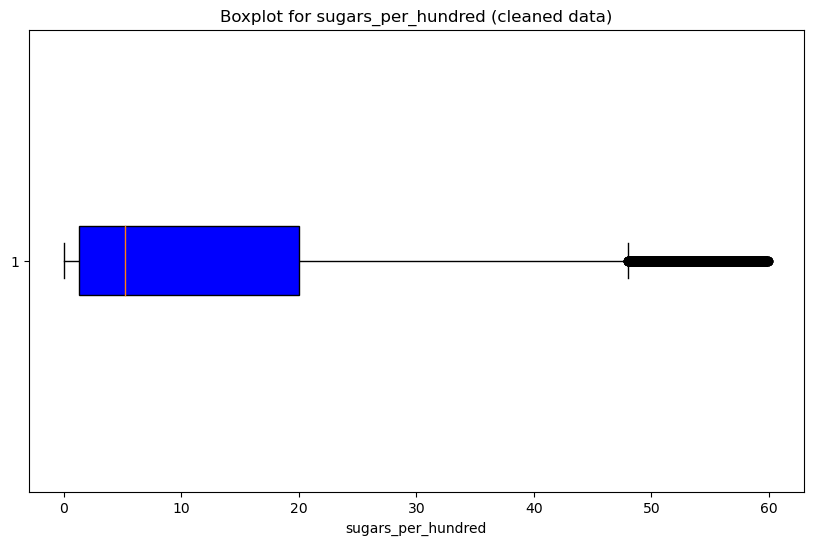

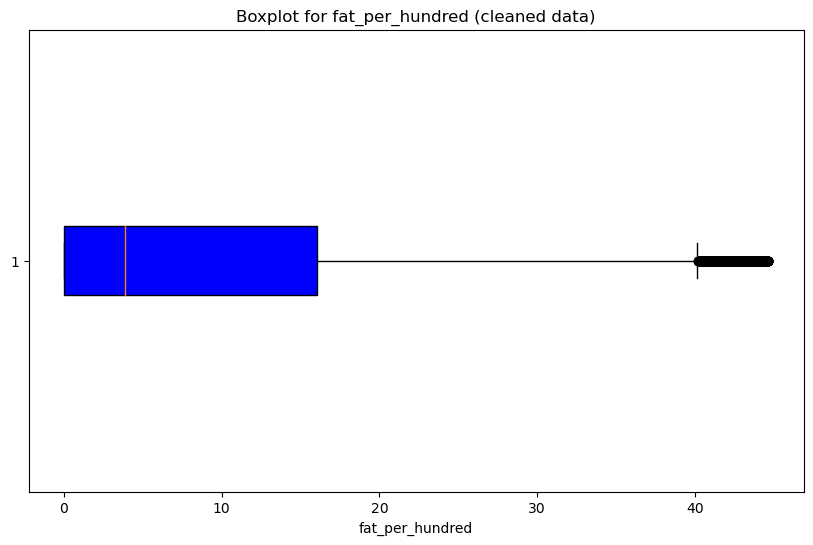

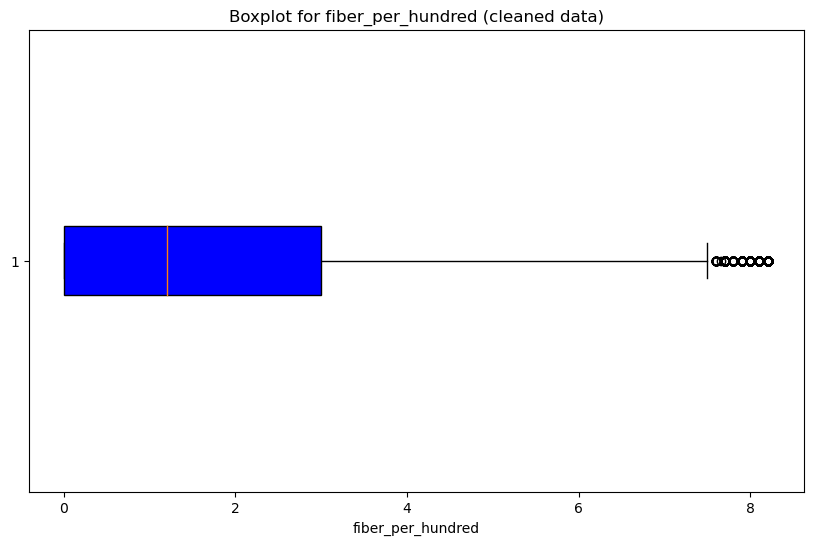

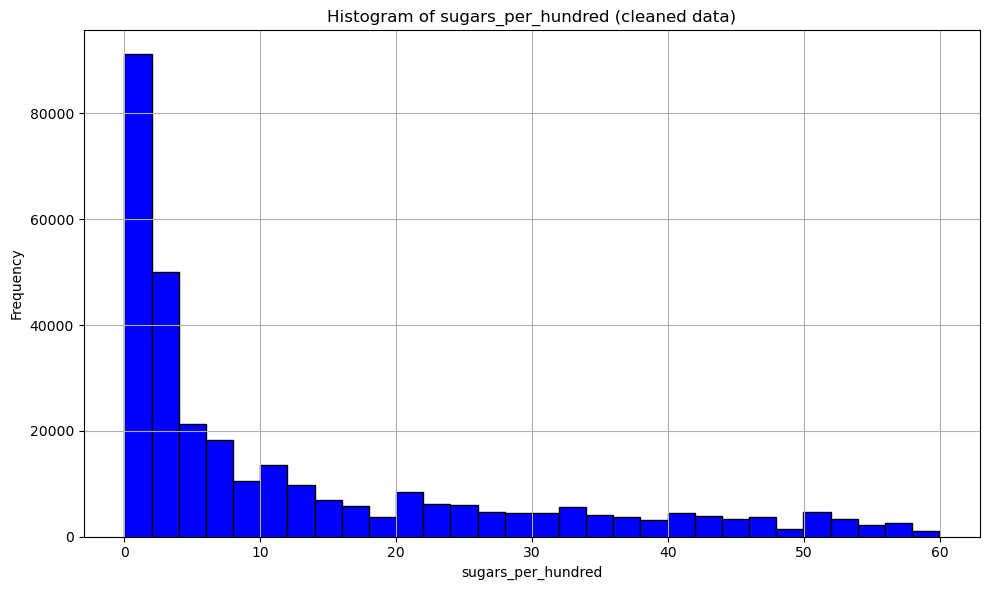

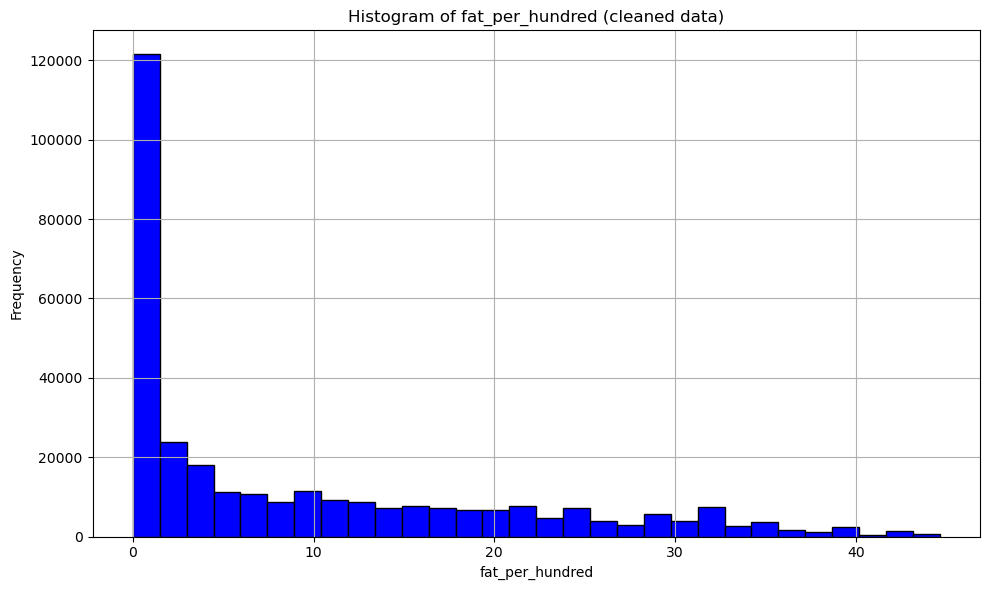

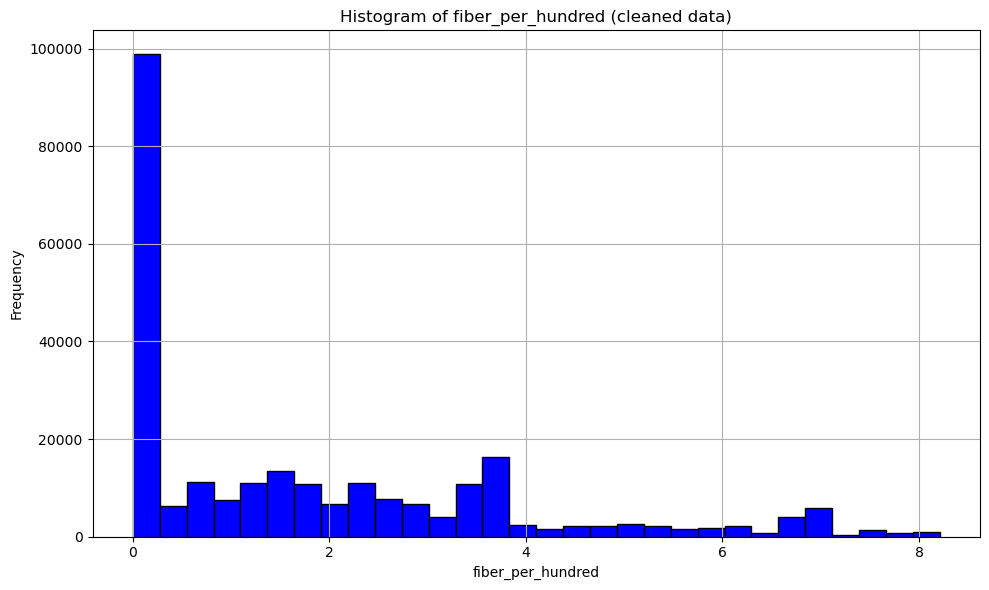

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Select a few examples of variables from the `_per_hundred` list
selected_columns = ['sugars_per_hundred', 'fat_per_hundred', 'fiber_per_hundred'] 

# Now write a function to detect and replace outlier
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  
    Q3 = df[column].quantile(0.75)  
    IQR = Q3 - Q1  # we need interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # all outliers should be replaced with NaN
    outliers = ~df[column].between(lower_bound, upper_bound)
    print(f"{column}: Replaced {outliers.sum()} outliers.")
    df.loc[outliers, column] = None

# Now I apply the function to selected columns
for col in selected_columns:
    handle_outliers_iqr(data, col)

# Check again descriptive statistics, how numbers behaves after cleaning
print("Descriptive Statistics After Cleaning Outliers:")
print(data[selected_columns].describe())

# Show the cleaned data
for col in selected_columns:
    plt.figure(figsize=(10, 6))
    plt.boxplot(data[col].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='blue'))
    plt.title(f"Boxplot for {col} (cleaned data)")
    plt.xlabel(col)
    plt.show()

# Present data on the histogram for better visuality
for col in selected_columns:
    plt.figure(figsize=(10, 6))
    data[col].dropna().hist(bins=30, color='blue', edgecolor='black')
    plt.title(f"Histogram of {col} (cleaned data)")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()
    
# Save cleaned data
data.to_pickle("cleaned_data_task_c.pkl")

### My approach

First, my goal is to check the data for skewnesss and define outliers so I need to visualize the distribution of each  variable I selected.
Z-score method will be useful to take care of variables with normal or close to normal distribution. That way I can distinguish values which are more than 3 standard deviations from the mean.
Interquartile Range method is in my opinion the most effective, if it goes about defining outliers for skewed distributions.
Lastly, I make sure that all the outliers will be marked and replaced and check the descriptive statistic once again.

### My observations:

- I picked the variables like sugars_per_hundred, fat_per_hundred, fiber_per_hundred are important nutrients in food and can have extreme values.
- After cleaning, descriptive statistics and boxplots showed that the data now falls within more reasonable ranges, with reduced influence from outliers.
- The IQR-based approach effectively removed outliers while preserving the overall distribution of the data.

---

# Text data

### Find and print the product with the longest ingredients list.

In [25]:
import pandas as pd

# Remove missing values from the `ingredients_en` column to ensure accurate analysis
data = data.dropna(subset=['ingredients_en'])

# Calculate the length of the ingredients list
data['ingredients_length'] = data['ingredients_en'].str.split(',').apply(len)

# Add a column for the count of unique ingredients
data["unique_ingredients_count"] = data["ingredients_en"].apply(
    lambda x: len(set(ingredient.strip() for ingredient in x.split(",")))
)

# WHich product has the longest ingredients list? .idmax looks for the row with max value
longest_ingredients_product = data.loc[data['ingredients_length'].idxmax()]

# Show final result: product name and its ingredients list
print("Product Name:", longest_ingredients_product['product_name_en'])
print("Ingredients List:", longest_ingredients_product['ingredients_en'])
print(f"Unique Ingredients Count: {longest_ingredients_product['unique_ingredients_count']}")

Product Name: VANILLA AND RASPBERRY, RED VELVET, CARROT, CHOCOLATE VARIETY PETIT FOURS, VANILLA AND RASPBERRY, RED VELVET, CARROT, CHOCOLATE
Ingredients List: WATER, POWDERED SUGAR (SUGAR, CORN STARCH), CHOCOLATE ICING (SUGAR, WATER, PALM OIL, CORN SYRUP, COCOA PROCESSED WITH ALKALI, CONTAINS 2% OR LESS OF: CARAMEL COLOR, CELLULOSE GUM, MONO- AND DIGLYCERIDES, NATURAL AND ARTIFICIAL FLAVOR, POLYSORBATE 60, POTASSIUM SORBATE [PRESERVATIVE], SORBIC ACID [PRESERVATIVE], SALT, SOY LECITHIN, SOYBEAN OIL, SULFITES, XANTHAN GUM), CARROT CAKE (SUGAR, ENRICHED WHEAT FLOUR BLEACHED [FLOUR, NIACIN, REDUCED IRON, THIAMINE MONONITRATE, RIBOFLAVIN, FOLIC ACID], SOYBEAN OIL, DEXTROSE, CARROTS, FOOD STARCH-MODIFIED, DRIED EGG YOLK, LEAVENING [BAKING SODA, SODIUM ACID PYROPHOSPHATE, SODIUM ALUMINUM PHOSPHATE, ALUMINUM SULFATE], DRIED EGG WHITES, NATURAL AND ARTIFICIAL FLAVOR, SALT, XANTHAN GUM, PROPYLENE GLYCOL, GUAR GUM, WATER, CARAMEL COLOR, CORN SYRUP, POLYSORBATE 80, GLYCERIN, CORN STARCH, CORN OIL

### My approach:
- Count all particular ingredients of each product by splitting the ingredients_en column at commas.
- Define which product hast the most ingredients by using idxmax() function (the highest value).
- As a last step print the ingredients list of that product.

### My observations:
- The product ingredients list indicate that this is probably very processed food. 
- This shows how diverse the data set is - from products containing only one igredient to that example with 110 different ingredients.

---

### Find the products with the shortest ingredients list, display examples, and comment on observations

In [26]:
import pandas as pd

# Remove all missing or errored data in `ingredients_en` and `product_name_en` columns to ensure accurate analysis
data = data[data['ingredients_en'].notna()]  # Keep only rows where `ingredients_en` is not NaN
data = data[data['ingredients_en'].str.strip().astype(bool)]  # Remove rows with empty or invalid strings
data = data[data['product_name_en'].notna()]  # Make sure `product_name_en` is not NaN

# Calculate the length of the ingredients list
data['ingredients_length'] = data['ingredients_en'].astype(str).str.split(',').apply(len)

# Which products have the shortest ingriedients list?
shortest_length = data['ingredients_length'].min()

# Filter products with the shortest ingredients list
shortest_ingredients_products = data[data['ingredients_length'] == shortest_length]

# Show some examples
shortest_ingredients_products[['product_name_en', 'ingredients_en']].head()

product_name_en        ingredients_en
2   Caffè Mauro - Roasted organic coffee blend  100%  coffee Arabica
5                    Cailler - Poudre de cacao          cocoa powder
7                                Knöpfli flour     durum wheat flour
8                 Naturaplan Bio Flower Honey                  Honey
11                   Rythm 108 - banana muffin    ingredient_missing

### My approach:
1. Use the min() function to find the smallest number of ingredients in the ingredients_en column.
2. Select all products with this smallest number of ingredients.
3. Present a few examples to look for patterns, i.e. repeated categories.
### My observations:
- Products with the shortest ingredients list are typically raw or single-ingredient items (flower, juice, fruits, coffee, etc.).
- This indicates the dataset includes also some minimally processed foods.

---

### Identify the most frequent ingredients, clean the data, and visualize the results

In [27]:
import pandas as pd

# Check the column `ingredients_en` for missing values
print("Summary of 'ingredients_en' column:")
print(data['ingredients_en'].describe())

# show some sample rows to inspect the text structure
print("\nSample ingredient data:")
sample_data = data['ingredients_en'].sample(10, random_state=42)
print(sample_data)

Summary of 'ingredients_en' column:
count                 361143
unique                247067
top       ingredient_missing
freq                   25178
Name: ingredients_en, dtype: object

Sample ingredient data:
13644     Sugar, maltodextrin, acidifier (tartaric acid)...
195316    CHEESE (COW MILK, GOAT MILK, AND SHEEP MILK, C...
324782                  PURIFIED WATER AND NATURAL FLAVORS.
214812    CARBONATED WATER, HIGH FRUCTOSE CORN SYRUP, CA...
85455     PORK LIVERS, WATER, PORK, PORK FAT, SEASONING ...
50948     WHOLE GRAIN OATS, SUGAR, OAT BRAN, CORN SYRUP,...
154732    NONFAT MILK, CREAM, CANE SUGAR, PEANUT BUTTER ...
277664                                   ingredient_missing
196018                  COCONUT MILK, WATER, SULFUR DIOXIDE
155640    LOWFAT MILK, SUGAR, COCOA {PROCESSED WITH ALKA...
Name: ingredients_en, dtype: object


------------

In [28]:
# cleaning the data for normalization:
import re

# define how the text should be cleaned
def clean_ingredient_text(text):
    """
    Cleans raw ingredient text by removing unnecessary punctuation, special characters,
    extra spaces, and normalizing to lowercase.
    """
    if pd.isnull(text):
        return ""  # Handle missing data
    text = text.lower()  # Normalize to lowercase
    text = re.sub(r"[^\w\s,%,]", "", text)  # Remove special characters except commas and % (for common sense)
    text = re.sub(r"\s+", " ", text).strip()  # Remove unneccessary spaces
    return text

# SHow a sample of cleaned 'ingredients_en' column
data['cleaned_ingredients'] = data['ingredients_en'].apply(clean_ingredient_text)
data[['ingredients_en', 'cleaned_ingredients']].head(10)

ingredients_en  \
0  Superior quality durum wheat Pasta\r\n\r\nIngr...   
1               Bio Milk (Switzerland), kitchen salt   
2                               100%  coffee Arabica   
3  Powdered chocolate 99% (sugar, cocoa), emulsif...   
4  cocoa paste * (Honduras), raw cane sugar * (Pa...   
5                                       cocoa powder   
6  Sugar, whole milk powder, cocoa butter, cocoa ...   
7                                  durum wheat flour   
8                                              Honey   
9  Sugar, Skimmed Milk Powder, Cocoa Butter, Gluc...   

                                 cleaned_ingredients  
0  superior quality durum wheat pasta ingredients...  
1                 bio milk switzerland, kitchen salt  
2                                100% coffee arabica  
3  powdered chocolate 99% sugar, cocoa, emulsifie...  
4  cocoa paste honduras, raw cane sugar paraguay,...  
5                                       cocoa powder  
6  sugar, whole milk powder, cocoa butter, cocoa ...  
7                                  durum wheat flour  
8                                              honey  
9  sugar, skimmed milk powder, cocoa butter, gluc...

--------

In [29]:
import pandas as pd
import re
from collections import Counter

# define how the text should be cleaned
def clean_ingredient_text(text):
    """
    Cleans raw ingredient text while retaining meaningful symbols like '%':
    - Normalize text to lowercase.
    - Remove special characters except commas and '%'.
    - Remove extra spaces and trim.
    """
    if pd.isnull(text):
        return ""  # Handle missing data
    text = text.lower()  # Normalize to lowercase
    text = re.sub(r"[^\w\s,%,]", "", text)  # Remove special characters except commas and '%'
    text = re.sub(r"\s+", " ", text).strip()  # Remove unneccessary spaces
    return text

# Use the cleaning function on ingredients_en column
data['cleaned_ingredients'] = data['ingredients_en'].apply(clean_ingredient_text)

# Define the tokenization function
def tokenize_ingredients(ingredients):
    """
    Splits the cleaned ingredient text into a list of individual ingredients.
    """
    if not ingredients:
        return []
    return [ingredient.strip() for ingredient in ingredients.split(",")]

# Apply tokenization
data['tokenized_ingredients'] = data['cleaned_ingredients'].apply(tokenize_ingredients)

# Flatten the list of all ingredients and calculate frequencies
all_ingredients = [ingredient for sublist in data['tokenized_ingredients'] for ingredient in sublist]
ingredient_counts = Counter(all_ingredients)

# Show 10 most frequent ingredients and count them
print("\nTop 10 most frequent ingredients:")
ingredient_counts.most_common(10)


Top 10 most frequent ingredients:


[('salt', 279326),
 ('sugar', 158657),
 ('water', 146680),
 ('citric acid', 79754),
 ('folic acid', 54348),
 ('natural flavor', 52367),
 ('enzymes', 47268),
 ('niacin', 47226),
 ('soy lecithin', 46199),
 ('corn syrup', 44744)]

#### My approach and order of functions:
1. Exploration:
- Look at the data to understand it better.
- Summarize the data and check a few samples to find any mistakes or patterns.
2. Cleaning:
- Make sure the text is consistent, like fixing formatting issues.
- This helps in breaking the text into smaller pieces and counting them.
3. Tokenization:
- Break the ingredient lists into individual words or small groups of words.
- Count how often each word or phrase appears across all the data.
----

#### Main issues + strategy:
- inconsistent punctuation and special characters (remove, keep only commas and %)
- random capitalization (convert all words to lowercase)
- additonal whitespace (normalization)
- missing values (replace with i.e. empty string)

In [30]:
import re

def clean_ingredient_text(text):
    """
    Cleans raw ingredient text by addressing main issues identified:
    - Normalize text to lowercase.
    - Remove special characters except commas.
    - Remove numeric values and units.
    - Handle missing data by replacing with an empty string.
    """
    if pd.isnull(text):
        return ""  # Handle missing data
    
    # Normalize to lowercase
    text = text.lower()
    
    # Remove special characters (except commas and %)
    text = re.sub(r"[^\w\s,%]", "", text)  # Remove special characters
    
    # Remove extra spaces and trim
    text = re.sub(r"\s+", " ", text).strip()
    
    return text

# Apply the cleaning strategy
data['cleaned_ingredients'] = data['ingredients_en'].apply(clean_ingredient_text)

data[['ingredients_en', 'cleaned_ingredients']].head(10)

ingredients_en  \
0  Superior quality durum wheat Pasta\r\n\r\nIngr...   
1               Bio Milk (Switzerland), kitchen salt   
2                               100%  coffee Arabica   
3  Powdered chocolate 99% (sugar, cocoa), emulsif...   
4  cocoa paste * (Honduras), raw cane sugar * (Pa...   
5                                       cocoa powder   
6  Sugar, whole milk powder, cocoa butter, cocoa ...   
7                                  durum wheat flour   
8                                              Honey   
9  Sugar, Skimmed Milk Powder, Cocoa Butter, Gluc...   

                                 cleaned_ingredients  
0  superior quality durum wheat pasta ingredients...  
1                 bio milk switzerland, kitchen salt  
2                                100% coffee arabica  
3  powdered chocolate 99% sugar, cocoa, emulsifie...  
4  cocoa paste honduras, raw cane sugar paraguay,...  
5                                       cocoa powder  
6  sugar, whole milk powder, cocoa butter, cocoa ...  
7                                  durum wheat flour  
8                                              honey  
9  sugar, skimmed milk powder, cocoa butter, gluc...

-----
### Check that the issues were indeed resolved (examples before and after text cleaning).

In [31]:
# Compare raw and cleaned data for some random samples
sample_data = data[['ingredients_en', 'cleaned_ingredients']].sample(10, random_state=42)

print("\nRaw vs Cleaned Ingredient Lists:")
for i, row in sample_data.iterrows():
    print(f"Raw: {row['ingredients_en']}")
    print(f"Cleaned: {row['cleaned_ingredients']}\n")


Raw vs Cleaned Ingredient Lists:
Raw: Sugar, maltodextrin, acidifier (tartaric acid), rice starch, flavorings, thickener (gum arabic), anti-caking agent (magnesium salts of fatty acids), antioxidant (ascorbic acid), coating agent (carnauba wax).
Cleaned: sugar, maltodextrin, acidifier tartaric acid, rice starch, flavorings, thickener gum arabic, anticaking agent magnesium salts of fatty acids, antioxidant ascorbic acid, coating agent carnauba wax

Raw: CHEESE (COW MILK, GOAT MILK, AND SHEEP MILK, CALCIUM CHLORIDE, RENNET, AND SALT), OLIVE OIL, ROSEMARY, THYME AND BLACK PEPPER.
Cleaned: cheese cow milk, goat milk, and sheep milk, calcium chloride, rennet, and salt, olive oil, rosemary, thyme and black pepper

Raw: PURIFIED WATER AND NATURAL FLAVORS.
Cleaned: purified water and natural flavors

Raw: CARBONATED WATER, HIGH FRUCTOSE CORN SYRUP, CARAMEL COLOR, CITRIC ACID, NATURAL AND ARTIFICIAL FLAVORS, SODIUM BENZOATE (PRESERVATIVE), PHOSPHORIC ACID, CAFFEINE, RED #40.
Cleaned: carbonate

-----
### Coose an appropriate method to visualize your findings.

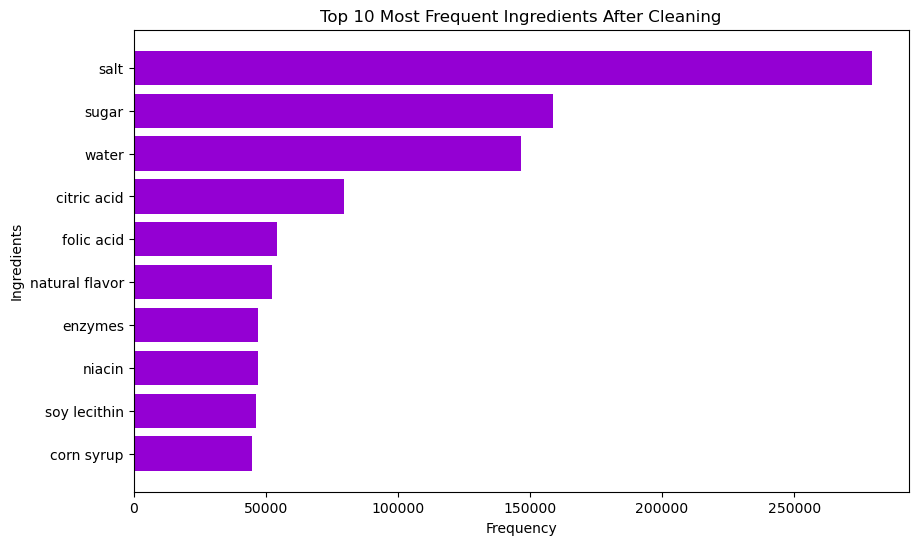

In [32]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import re

# Copied def how to clean the text from previous task
def clean_ingredient_text(text):
    """
    Cleans raw ingredient text while retaining meaningful symbols like '%':
    - Normalize text to lowercase.
    - Remove special characters except commas and '%'.
    - Remove extra spaces and trim.
    """
    if pd.isnull(text):
        return ""  # Handle missing data
    text = text.lower()  # Normalize to lowercase
    text = re.sub(r"[^\w\s,%,]", "", text)  # Remove special characters except commas and '%'
    text = re.sub(r"\s+", " ", text).strip()  # Remove add. soaces
    return text

# Apply cleaning function to create 'cleaned_ingredients' column
if 'cleaned_ingredients' not in data.columns:
    data['cleaned_ingredients'] = data['ingredients_en'].apply(clean_ingredient_text)

# tokenize ingredients
def tokenize_ingredients(ingredients):
    """
    Splits the cleaned ingredient text into a list of individual ingredients.
    """
    if not ingredients:
        return []
    return [ingredient.strip() for ingredient in ingredients.split(",")]

# Apply tokenization
data['tokenized_ingredients'] = data['cleaned_ingredients'].apply(tokenize_ingredients)

# Flatten the list of all ingredients and calculate frequencies
all_ingredients = [ingredient for sublist in data['tokenized_ingredients'] for ingredient in sublist]
ingredient_counts = Counter(all_ingredients)

# show top 10 most frequent ingredients
top_ingredients = ingredient_counts.most_common(10)
ingredients, counts = zip(*top_ingredients)

# Step 5: Visualize the top 10 ingredients
plt.figure(figsize=(10, 6))
plt.barh(ingredients, counts, color="darkviolet")
plt.xlabel("Frequency")
plt.ylabel("Ingredients")
plt.title("Top 10 Most Frequent Ingredients After Cleaning")
plt.gca().invert_yaxis()
plt.show()

### Final observations:

- Ingredients such as salt, sugar and water are the most frequent, being a base for processed food from the database.
- Some ingredients like natural flavor and citric acid reflect the addition of flavor enhancers and preservatives, which is common in processed foods.
- Retaining meaningful characters like % ensured that critical details (e.g., "99% cocoa") were preserved for accurate analysis.
- Visualization: The horizontal bar chart shows best which ingredients are top, where we can clearly see the frequencies differences.
----

# EDA: Time-series data

### Investigate the total number of items created each month at each hour + heatmap.

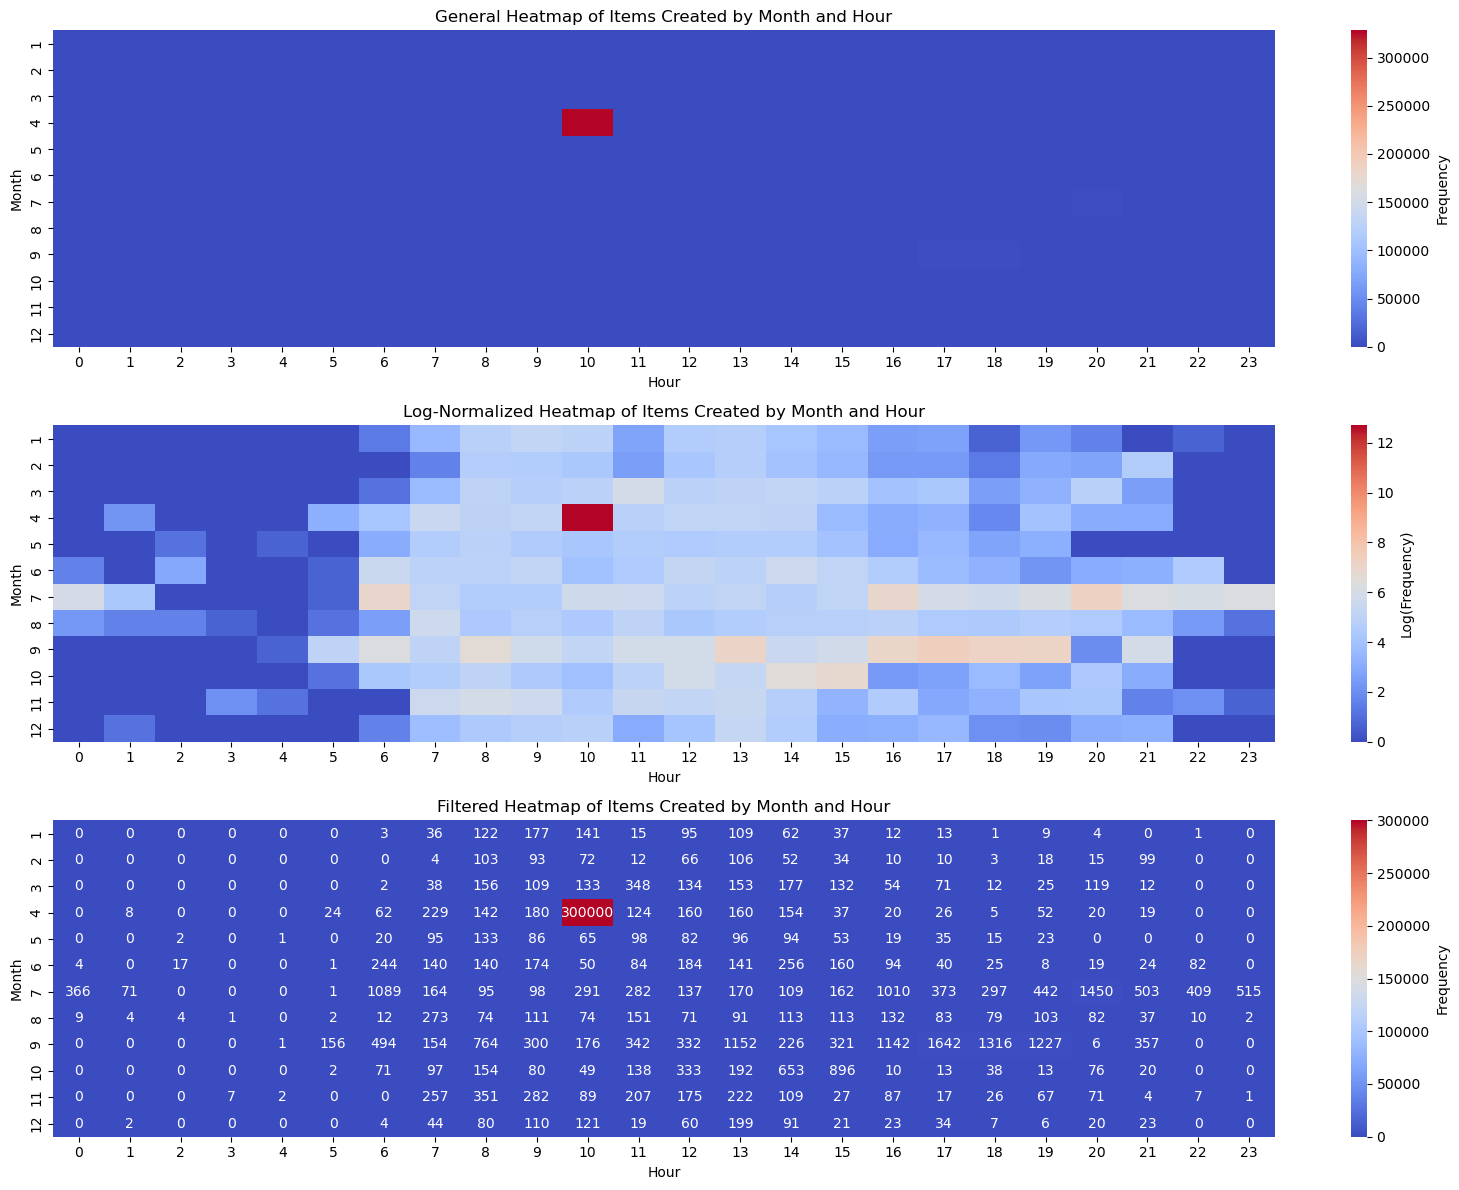

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Convert 'created_at' to datetime and extract month and hour for investigation
# I use .dt accessor to get the hour and month easily
data['created_at'] = pd.to_datetime(data['created_at'], errors='coerce')
data['hour'] = data['created_at'].dt.hour
data['month'] = data['created_at'].dt.month

# Group by month and hour and count occurrences
# I use .unstack to reshape the grouped data into a table format
heatmap_data = data.groupby(['month', 'hour']).size().unstack(fill_value=0)

# Create heatmaps to visualize the frequency of items for each month-hour pair
plt.figure(figsize=(16, 12))

# General heatmap
plt.subplot(3, 1, 1)
sns.heatmap(heatmap_data, cmap="coolwarm", annot=False, cbar_kws={'label': 'Frequency'})
plt.title("General Heatmap of Items Created by Month and Hour")
plt.xlabel("Hour")
plt.ylabel("Month")

# Log-normalized heatmap to show details
plt.subplot(3, 1, 2)
log_data = np.log1p(heatmap_data)  # with this function I can scale the data logarithmically, that way reducing the impact of very high values
sns.heatmap(log_data, cmap="coolwarm", annot=False, cbar_kws={'label': 'Log(Frequency)'})
plt.title("Log-Normalized Heatmap of Items Created by Month and Hour")
plt.xlabel("Hour")
plt.ylabel("Month")

# Heatmap with filtered outliers (cap frequency at 300,000)
plt.subplot(3, 1, 3)
filtered_data = heatmap_data.clip(upper=300000)  # with .clip function I can limit high frequencies for easier comparison purposes
sns.heatmap(filtered_data, cmap="coolwarm", annot=True, fmt="d", cbar_kws={'label': 'Frequency'}) # annot=True - this helps me show exact values in each cell for understandable plot
plt.title("Filtered Heatmap of Items Created by Month and Hour")
plt.xlabel("Hour")
plt.ylabel("Month")

plt.tight_layout()
plt.show()

### My observations:
- We can name a specific month and hour (March at 10 AM) with a lot of entries. The cause can be either an error or bulk upload that time.
- Most month and hour combinations have very little to no entries, meaning product uploads are not divided in regular intervals.
- There is almost no activity outside normal working hours, like early mornings or late evenings (standard work schedule).
- Also mid-morning and early afternoon hours have more activity than very early or very late.
- Some months have more entries than others, possibly due to seasonal updates or specific projects.
----

### Investigate the evolution of the total number of items over time + stacked bar plot.

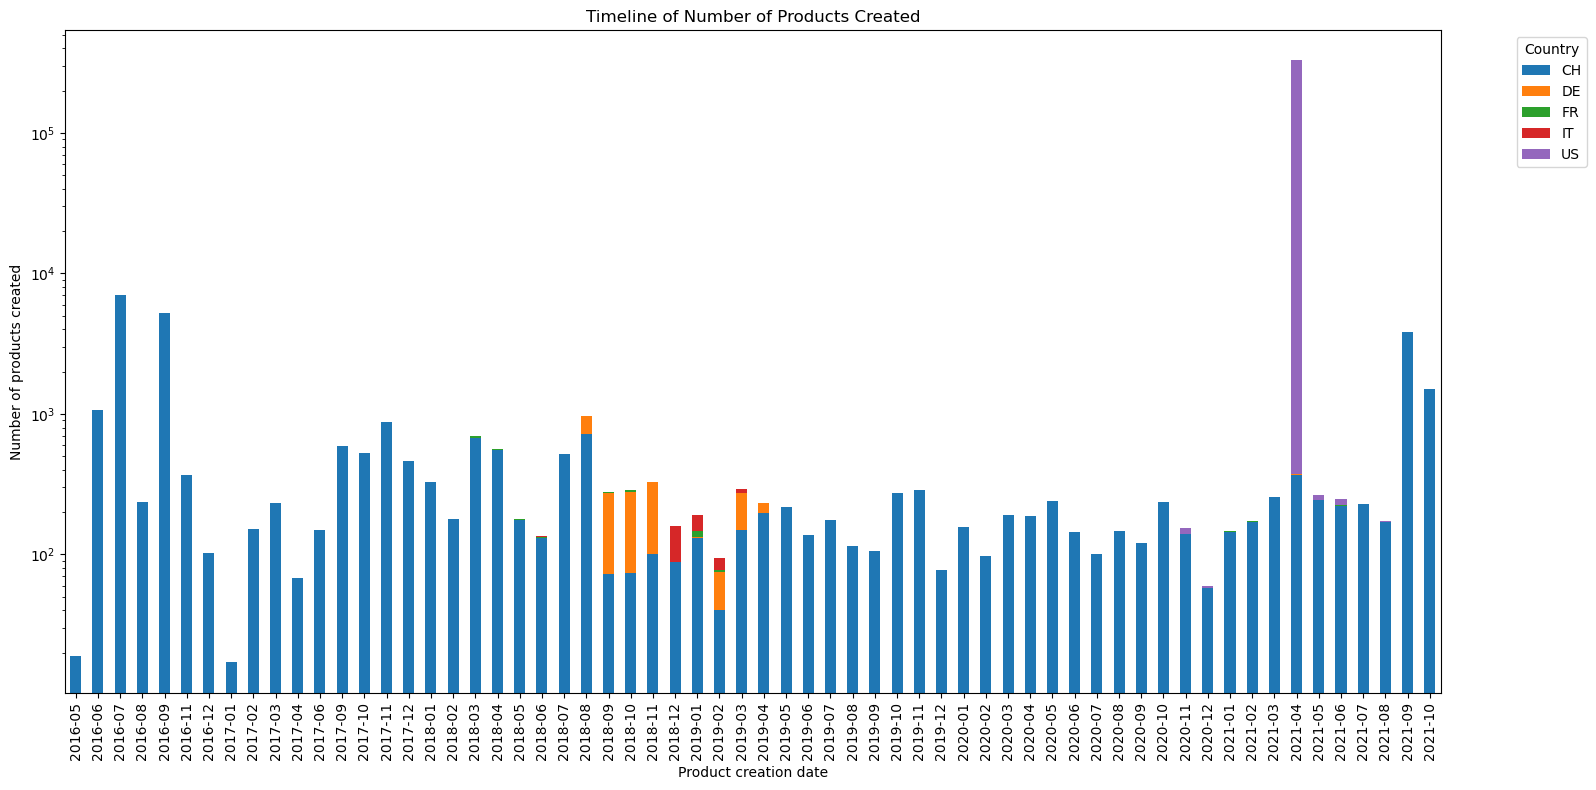

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Change 'created_at' to datetime and remove timezone information for data readability
data['created_at'] = pd.to_datetime(data['created_at'], errors='coerce').dt.tz_localize(None)

# Extract 'year_month' from 'created_at' using the following function as a single period for grouping
data['year_month'] = data['created_at'].dt.to_period('M')

# Keep only the definied countries
selected_countries = ['CH', 'DE', 'FR', 'IT', 'US']
data = data[data['country'].isin(selected_countries)]

# Group the data by 'year_month' and 'country' and count items
stacked_data = data.groupby(['year_month', 'country']).size().unstack(fill_value=0)

# Define colors for each country
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # blue, orange, green, red, purple

# Plot stacked bar chart with custom colors and logarithmic scale
stacked_data.index = stacked_data.index.astype(str)  # Convert PeriodIndex to string for plotting
stacked_data.plot(kind='bar', stacked=True, figsize=(16, 8), color=custom_colors, logy=True) # Apply logy=True to the y-axis to make small and large values easier to compare.
plt.title("Timeline of Number of Products Created")
plt.xlabel("Product creation date")
plt.ylabel("Number of products created")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left') # adding legend for clarity
plt.tight_layout() # tight_layout() prevent overlapping elements
plt.show()

### My observation:
- Switzerland (CH) update their data regularly over time, showing systematic and quite stable contributions.
- I can observe a big spike in America (US) in March 2021. The cause is unknown but it could be an update of the database.
- Germany (DE) shows more activity during late summer or early winter. The cause is also unknown but there could be a seasonal update.
- France (FR) and Italy (IT) presents periods with little to no activity (maybe connected to some events).

----

# Correlation analysis

### Analyze the correlation between energy_per_hundred and other per_hundred columns.

In [35]:
import pandas as pd

# use cleaned data from task C
data = pd.read_pickle("cleaned_data_task_c.pkl")

# create matrix to see correlation between 'energy_per_hundred' and '_per_hundred'
correlation_matrix = data.corr()

# Drop the correlations of 'energy_per_hundred'
energy_correlations = correlation_matrix['energy_per_hundred'].drop('energy_per_hundred')

# Sort correlations to define the most and least correlated columns
sorted_correlations = energy_correlations.sort_values(ascending=False)

# Show the final correlations
sorted_correlations.head(10), sorted_correlations.tail(10)

(calculated_kcal                            1.000000
 energy_kcal_per_hundred                    0.997354
 calculated_energy                          0.988697
 fat_per_hundred_energy                     0.762965
 monounsaturated_fatty_acids_per_hundred    0.717789
 fat_per_hundred                            0.707782
 total_macronutrients                       0.693849
 saturated_fat_per_hundred                  0.650324
 polyunsaturated_fatty_acids_per_hundred    0.608775
 fatty_acids_total_saturated_per_hundred    0.562141
 Name: energy_per_hundred, dtype: float64,
 alcohol_by_volume                     -0.006711
 vitamin_b1_thiamin_per_hundred        -0.007355
 id                                    -0.025619
 salt_per_hundred                      -0.029794
 vitamin_a_iu_per_hundred              -0.046219
 vitamin_b3_niacin_per_hundred         -0.059498
 vitamin_c_ascorbic_acid_per_hundred   -0.069497
 portion_quantity                      -0.072577
 sodium_per_hundred                

### My observations:

- Learned that correlation strength depends on the absolute value, not just whether it’s positive or negative.
- **strong positive correlations**:
energy_kcal_per_hundred (0.997): this is expected, as both columns measure energy in different units.
fat_per_hundred_energy (0.763) and monounsaturated_fatty_acids_per_hundred (0.718): these show that fat brings a lot to the final energy content.

- **moderate positive correlations**:
fat_per_hundred (0.708) and total_macronutrients (0.694): products with more fat and macronutrients can give more energy.
saturated_fat_per_hundred (0.650) and polyunsaturated_fatty_acids_per_hundred (0.609): fats are connected to energy.

- **weak correlations (close to zero)**:
alcohol_by_volume (-0.007) and vitamin_b1_thiamin_per_hundred (-0.007): these nutrients have almost no relationship with energy.

---

### Visualize the relationships between energy_per_hundred and other nutrients.

### My approach:

- I calculated the correlation between energy_per_hundred and all nutrient columns.
- Then I removed non-nutrient columns like difference, id, etc.
- Then, I selected the 3 most correlated and 3 least correlated nutrients.
- Next step -  I created cross-tables for the selected columns to check how the nutrient values are distributed against energy.
- I removed rows with fewer than 5 observations, because too few data points can make the results unreliable.
- final step - I plotted scatterplots to show how these 6 nutrients relate to energy_per_hundred.

In [57]:
import pandas as pd
data = pd.read_pickle("cleaned_data_task_c.pkl")

# calculate correlation matrix
correlation_matrix = data.corr()

# calculate the absolute correlations with 'energy_per_hundred'
abs_correlations = correlation_matrix['energy_per_hundred'].abs().drop('energy_per_hundred')

# sort the correlations
sorted_correlations = abs_correlations.sort_values(ascending=False)

# exclude non-nutrients to make sense
non_nutrients = ['difference', 'id', 'portion_quantity', 'quantity', 'calculated_kcal', 'calculated_energy']

# remove non-nutrient columns from the correlation results
sorted_correlations = sorted_correlations[~sorted_correlations.index.isin(non_nutrients)]

# which are 3 most and 3 least correlated nutrients:
top3_most_correlated = sorted_correlations.head(3).index.tolist()
top3_least_correlated = sorted_correlations.tail(3).index.tolist()

print("Top 3 most correlated nutrients:", top3_most_correlated)
print("Top 3 least correlated nutrients:", top3_least_correlated)

Top 3 most correlated nutrients: ['energy_kcal_per_hundred', 'fat_per_hundred_energy', 'monounsaturated_fatty_acids_per_hundred']
Top 3 least correlated nutrients: ['vitamin_b1_thiamin_per_hundred', 'alcohol_by_volume', 'vitamin_d_d2_d3_international_units_per_hundred']


In [53]:
# check cross-tables and remove rows with where the frequencies are rare
valid_features = []

# select together the top 3 most and least correlated nutrients
selected_features = top3_most_correlated + top3_least_correlated

for column in selected_features:
    # Generate the cross-tabulation
    cross_tab = pd.crosstab(index=data[column], columns=data['energy_per_hundred'])

    # we dont need rows with fewer than 5 observations
    cross_tab_filtered = cross_tab.loc[(cross_tab >= 5).any(axis=1)]

    # I can keep the feature only if there's enough valid data left ti show on viz
    if not cross_tab_filtered.empty:
        valid_features.append(column)
        
valid_features

['energy_kcal_per_hundred',
 'fat_per_hundred_energy',
 'monounsaturated_fatty_acids_per_hundred',
 'vitamin_b1_thiamin_per_hundred',
 'alcohol_by_volume',
 'vitamin_d_d2_d3_international_units_per_hundred']

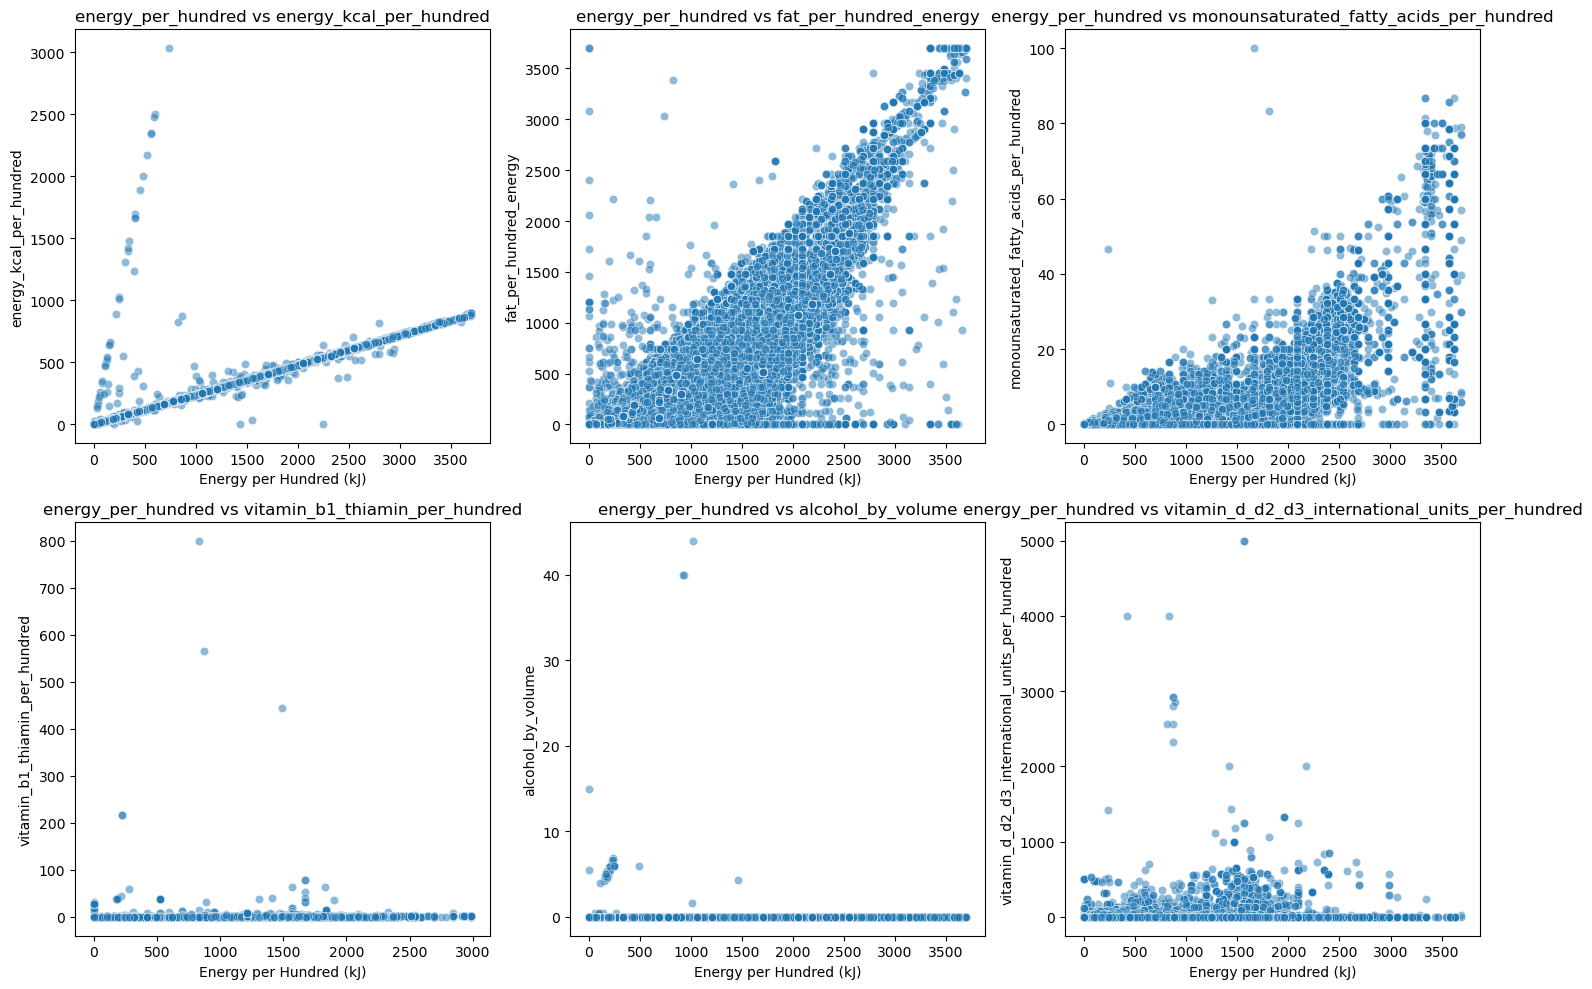

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot scatterplots for top 3 and bottom 3 nutrients
plt.figure(figsize=(15, 10))

for i, column in enumerate(valid_features):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=data['energy_per_hundred'], y=data[column], alpha=0.5)
    plt.title(f"energy_per_hundred vs {column}")
    plt.xlabel("Energy per Hundred (kJ)")
    plt.ylabel(column)

plt.tight_layout()
plt.show()

### My observations:
- Top 3 most correlated nutrients:
1. energy_kcal_per_hundred: that relationship looks almost perfectly linear, which makes sense because both measure energy but in different units.
2. fat_per_hundred_energy: that relationship is mostly linear. As energy increases, fat energy also increases.
3. monounsaturated_fatty_acids_per_hundred: that relationship could be linear, but the higher values are more spreaded.
- Top 3 least correlated nutrients:
1. vitamin_b1_thiamin_per_hundred: the points are scattered with no clear pattern, showing no strong relationship with energy.
2. alcohol_by_volume: the points are clustered near zero, which shows no clear relationship.
3. vitamin_d_d2_d3_international_units_per_hundred: the values are mostly low, with no clear pattern or rrelationship.
- There are some outliers in both highly and weakly correlated variables and removing these outliers might make the relationships even clearer.

----

### Test independence of categorical variables.

In [40]:
# use cleaned data from task C
data = pd.read_pickle("cleaned_data_task_c.pkl")

# create three categories for energy column using pd.qcut to make sure each group has 
data['energy_category'] = pd.qcut(data['energy_per_hundred'], q=3, labels=['low', 'medium', 'high'])

# I need to build a cross table for energy category and country to show each combinations for chi-square test
cross_table = pd.crosstab(data['energy_category'], data['country'])

# try the chi-square test to determine if two categories are independent or not
from scipy.stats import chi2_contingency
chi2_stat, p_value, dof, expected = chi2_contingency(cross_table)

# Show the chi-square test results (statistics shows the difference between observed and expected counts, p-value says about (in)dependencies of variables, 
# "dof" - no. of values free to vary and expected frequencies - what result can we achieve if variables are independent)
chi_square_results = {
    "Chi-square Statistic": chi2_stat,
    "P-value": p_value,
    "Degrees of Freedom": dof,
    "Expected Frequencies": expected
}
chi_square_results

{'Chi-square Statistic': 34.93244441990817,
 'P-value': 0.00048005077144937355,
 'Degrees of Freedom': 12,
 'Expected Frequencies': array([[3.33512223e-01, 8.60228077e+03, 3.29843589e+02, 1.80096601e+01,
         9.23828858e+01, 3.33512223e-01, 1.04681816e+05],
        [3.37154537e-01, 8.69622698e+03, 3.33445837e+02, 1.82063450e+01,
         9.33918068e+01, 3.37154537e-01, 1.05825055e+05],
        [3.29333239e-01, 8.49449225e+03, 3.25710574e+02, 1.77839949e+01,
         9.12253073e+01, 3.29333239e-01, 1.03370129e+05]])}

### My observations:
- **Chi-Square Statistic**: The value is 34.93, which is quite high. This means that energy level and country are related.
- **P-Value**: The p-value was 0.00048, which is way below 0.05. This means we can assume that energy level and country are connected.
- **Expected Frequencies**: The expected counts matched what we would expect if the two variables were independent, which shows that the test was conducted correctly.
- I should reject the Null Hypothesis: The very small value of p-value means that energy level and country are not independent. This shows that the energy level of products could depend on the country where they are produced.
- Chi-square test is very helpful to determine if two categories are connected and dependent or not.
- It can be connected with dietary habits in eating habits and productions ways in different countries.

----

### Advanced EDA

#### Count samples by country.

In [41]:
# use cleaned data from task C (it ensures that the data used for this analysis is reliable)
data = pd.read_pickle("cleaned_data_task_c.pkl")

# Count the total number of samples by country
country_sample_counts = data['country'].value_counts()

# Set a threshold for small sample size (I pick 50 to exclude countries with insufficient data)
threshold = 50

# Filter out countries with sample sizes below the threshold
filtered_country_counts = country_sample_counts[country_sample_counts >= threshold]

# Display the filtered results
print("Filtered Country Sample Counts:")
print(filtered_country_counts)


Filtered Country Sample Counts:
US    328289
CH     43617
DE     10639
IT      2719
FR       118
Name: country, dtype: int64


#### The output shows that countries like the US and CH have a significant number of samples, while FR and IT have lower counts but still meet the threshold.

---------

#### Organic vs. non-organic by country.

In [42]:
# use cleaned data from task C (it ensures that the data used for this analysis is reliable)
data = pd.read_pickle("cleaned_data_task_c.pkl")

# set up classification: "organic" or "non-organic"
data['is_organic'] = data['product_name_en'].str.contains(r'\b(?:bio|organic)\b', case=False, na=False)

# Group by country and  classification from above
organic_counts = data.groupby(['country', 'is_organic']).size().unstack(fill_value=0)

# calculate the % of organic products in separate column
organic_counts['percentage_organic'] = (organic_counts[True] / organic_counts.sum(axis=1)) * 100

# Sort the results by % desc
organic_counts_sorted = organic_counts.sort_values(by='percentage_organic', ascending=False)

# Display the results
print("Organic vs Non-Organic Counts by Country:")
print(organic_counts_sorted)

# Identify the country with the highest percentage of organic products
highest_organic_country = organic_counts['percentage_organic'].idxmax()
highest_organic_percentage = organic_counts['percentage_organic'].max()

Organic vs Non-Organic Counts by Country:
is_organic   False   True  percentage_organic
country                                      
US          312165  16124            4.911526
CH           41718   1899            4.353807
FR             115      3            2.542373
DE           10562     77            0.723752
IT            2713      6            0.220669
AT               1      0            0.000000
UK               1      0            0.000000


#### Country with the highest percentage of organic products: US (4.91%)

-----

#### Macronutrient comparison

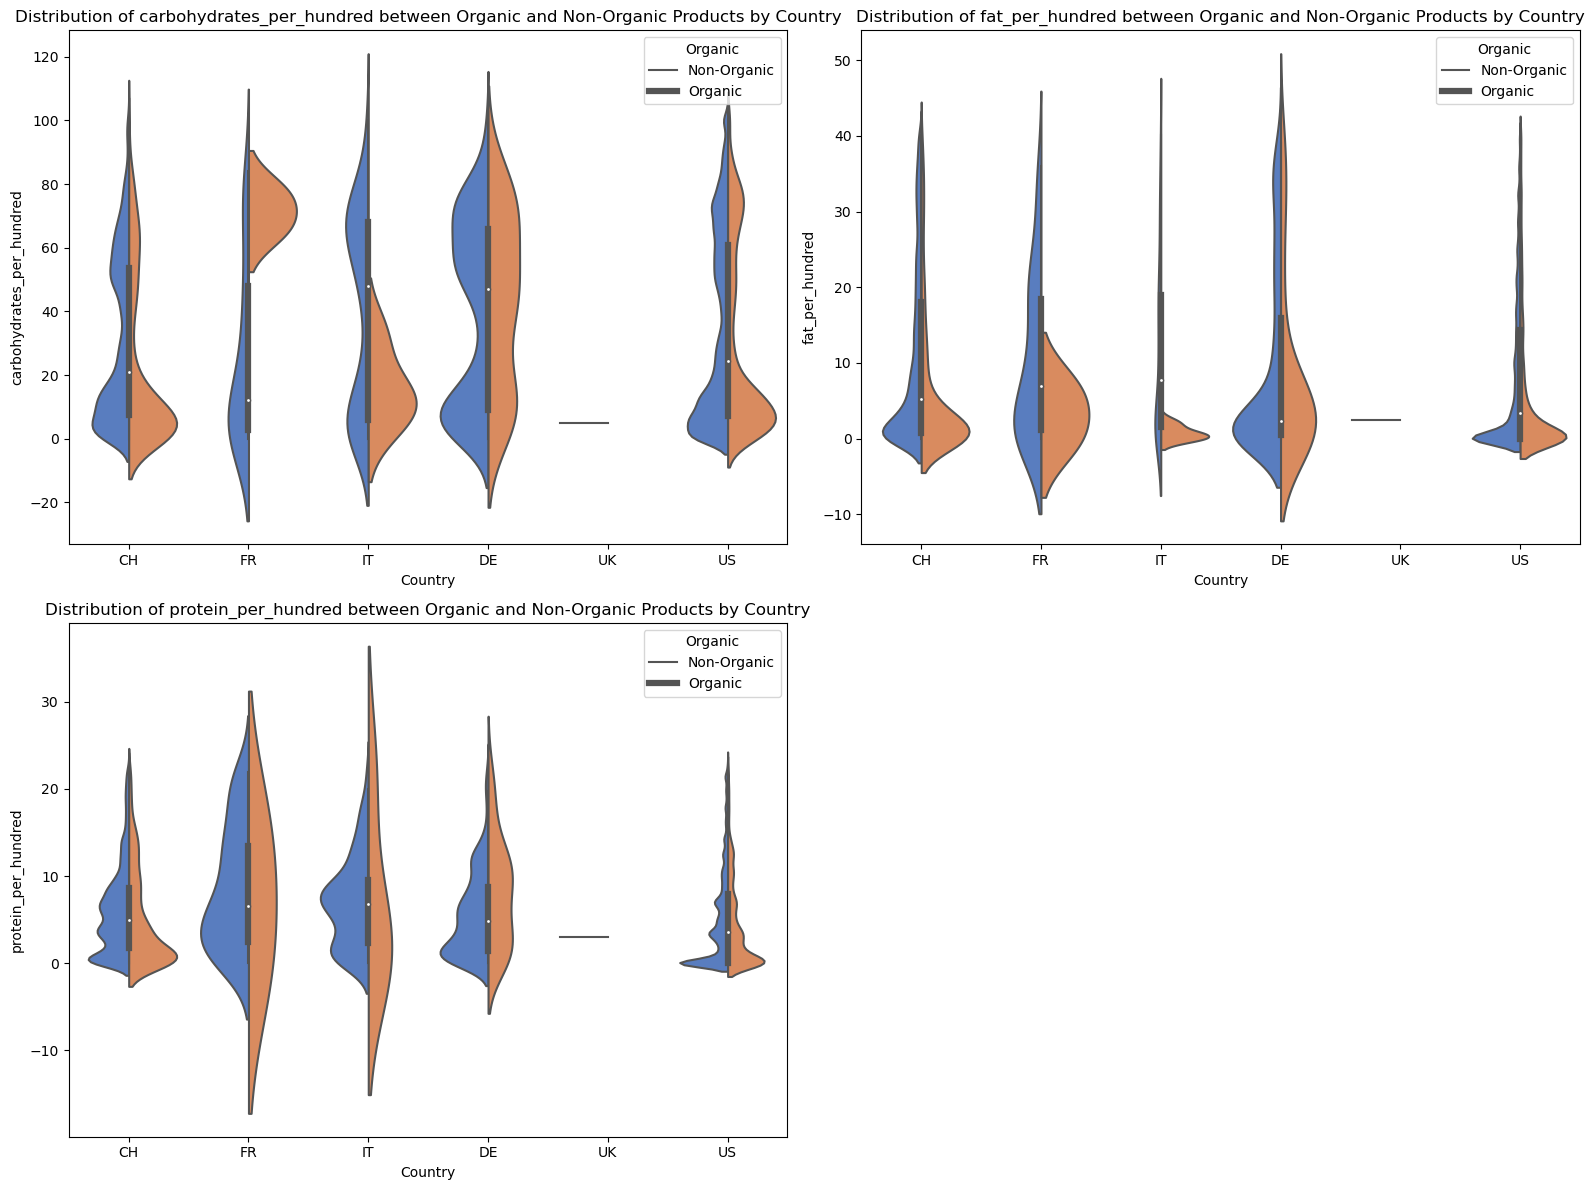

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use cleaned data from Task C
data = pd.read_pickle("cleaned_data_task_c.pkl")

# we need 'is_organic' column for the plots
data['is_organic'] = data['product_name_en'].str.contains(r'\b(?:bio|organic)\b', case=False, na=False)

# pick the macronutrients
macronutrients = ['carbohydrates_per_hundred', 'fat_per_hundred', 'protein_per_hundred']

# filter the dataset for important columns and drop missing values using .dropna
relevant_data = data[['country', 'is_organic'] + macronutrients].dropna()

# we need to define outliers for appropriate visual scaling
def handle_outliers(df, column):
    """Replace outliers outside 1.5 * IQR with NaN for better scaling."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = None

# handle outliers for each column
for nutrient in macronutrients:
    handle_outliers(relevant_data, nutrient)

# use function .dropna for rows with NaN
relevant_data = relevant_data.dropna()

# create violin plots for each column (macronutrients)
plt.figure(figsize=(16, 12))
for i, nutrient in enumerate(macronutrients, 1):
    plt.subplot(2, 2, i)
    sns.violinplot(
        data=relevant_data,
        x='country',
        y=nutrient,
        hue='is_organic',
        split=True,
        palette='muted'
    )
    plt.title(f"Distribution of {nutrient} between Organic and Non-Organic Products by Country")
    plt.xlabel("Country")
    plt.ylabel(nutrient)
    plt.legend(title='Organic', loc='upper right', labels=['Non-Organic', 'Organic'])

plt.tight_layout()
plt.show()

- I used the cleaned dataset from Task C as in the previous task.
- I classified the products as "organic" or "non-organic" checking the words "bio" or "organic" in product names.
- Important part - getting rid of outliers and handle missing data, otherwise the plots will be confusing.

#### My observations:
- Carbohydrates:
In FR and IT, organic and non-organic are similar.
CH shows higher carbs in organic.
DE and UK have more variation in non-organic.
- Fat:
IT and FR are very similar for both types.
CH shows non-organic with slightly more fat.
DE and US have bigger differences.
- Protein:
IT shows overlap between organic and non-organic.
CH and FR are similar.
US organic products seem higher in protein.
- also what I noticed:
Organic products are more consistent across countries.
Non-organic products vary more in nutrients.